# Incident management process enriched event log Data Set https://archive.ics.uci.edu/ml/datasets/Incident+management+process+enriched+event+log#
### _Abstract: This event log was extracted from data gathered from the audit system of an instance of the ServiceNow platform used by an IT company and enriched with data loaded from a relational database._

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_file_name = 'incident_event_log.csv'
full_data_frame = pd.read_csv(data_file_name, na_values='?')

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
full_data_frame.head()

number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify problem_id  rfc vendor caused_by  \
0                   False  Do Not Notify        NaN  NaN    NaN       NaN   
1                   False  Do Not Notify        NaN  NaN    NaN       NaN   
2                   False  Do Not Notify        NaN  NaN    NaN       NaN   
3                   False  Do Not Notify        NaN  NaN    NaN       NaN   
4                   False  Do Not Notify        NaN  NaN    NaN       NaN   

  closed_code      resolved_by      resolved_at       closed_at  
0      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
1      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
2      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
3      code 5  Resolved by 149  29/2/2016 11:29  5/3/2016 12:00  
4      code 5   Resolved by 81   1/3/2016 09:52  6/3/2016 10:00  

[5 rows x 36 columns]

In [4]:
full_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
number                     141712 non-null object
incident_state             141712 non-null object
active                     141712 non-null bool
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null bool
caller_id                  141683 non-null object
opened_by                  136877 non-null object
opened_at                  141712 non-null object
sys_created_by             88636 non-null object
sys_created_at             88636 non-null object
sys_updated_by             141712 non-null object
sys_updated_at             141712 non-null object
contact_type               141712 non-null object
location                   141636 non-null object
category                   141634 non-null object
subcategory                141601 non-null objec

## Attribute Information:

| # | name | description |
| -- | -- | -- |
| 1 | number | incident identifier (24,918 different values) |
| 2 | incident state | eight levels controlling the incident management process transitions from opening until closing the case |
| 3 | active | boolean attribute that shows whether the record is active or closed/canceled |
| 4 | reassignment_count | number of times the incident has the group or the support analysts changed |
| 5 | reopen_count | number of times the incident resolution was rejected by the caller |
| 6 | sys_mod_count | number of incident updates until that moment |
| 7 | made_sla | boolean attribute that shows whether the incident exceeded the target SLA |
| 8 | caller_id | identifier of the user affected |
| 9 | opened_by | identifier of the user who reported the incident |
| 10 | opened_at | incident user opening date and time |
| 11 | sys_created_by | identifier of the user who registered the incident |
| 12 | sys_created_at | incident system creation date and time |
| 13 | sys_updated_by | identifier of the user who updated the incident and generated the current log record |
| 14 | sys_updated_at | incident system update date and time |
| 15 | contact_type | categorical attribute that shows by what means the incident was reported |
| 16 | location | identifier of the location of the place affected |
| 17 | category | first-level description of the affected service |
| 18 | subcategory | second-level description of the affected service (related to the first level description, i.e., to category) |
| 19 | u_symptom | description of the user perception about service availability |
| 20 | cmdb_ci | (confirmation item) identifier used to report the affected item (not mandatory) |
| 21 | impact | description of the impact caused by the incident (values: 1 - High, 2 - Medium, 3 - Low) |
| 22 | urgency | description of the urgency informed by the user for the incident resolution (values: 1 - High, 2 - Medium,  3 - Low) |
| 23 | priority | calculated by the system based on 'impact' and 'urgency' |
| 24 | assignment_group | identifier of the support group in charge of the incident |
| 25 | assigned_to | identifier of the user in charge of the incident |
| 26 | knowledge | boolean attribute that shows whether a knowledge base document was used to resolve the incident |
| 27 | u_priority_confirmation | boolean attribute that shows whether the priority field has been double-checked |
| 28 | notify | categorical attribute that shows whether notifications were generated for the incident |
| 29 | problem_id | identifier of the problem associated with the incident |
| 30 | rfc | (request for change) identifier of the change request associated with the incident |
| 31 | vendor | identifier of the vendor in charge of the incident |
| 32 | caused_by | identifier of the RFC responsible by the incident |
| 33 | close_code | identifier of the resolution of the incident |
| 34 | resolved_by | identifier of the user who resolved the incident |
| 35 | resolved_at | incident user resolution date and time (dependent variable) |
| 36 | closed_at | incident user close date and time (dependent variable) |

In [5]:
full_data_frame.count().sort_values()

caused_by                      23
vendor                        244
cmdb_ci                       445
rfc                           991
problem_id                   2295
sys_created_by              88636
sys_created_at              88636
u_symptom                  108748
assigned_to                114216
assignment_group           127499
opened_by                  136877
resolved_at                138571
closed_code                140998
resolved_by                141486
subcategory                141601
category                   141634
location                   141636
caller_id                  141683
u_priority_confirmation    141712
notify                     141712
knowledge                  141712
priority                   141712
number                     141712
impact                     141712
contact_type               141712
sys_updated_at             141712
sys_updated_by             141712
opened_at                  141712
made_sla                   141712
sys_mod_count 

### Отбросим параметры с большим количеством пропущенных данных

In [6]:
full_data_frame = full_data_frame.drop([
    'caused_by', 'vendor', 'cmdb_ci', 'rfc', 'problem_id', 'sys_created_by', 'sys_created_at'
], axis=1)

## 1. Анализ и подготовка данных

## Дубликаты записей
### Согласно описанию, в наборе данных прсутствуют повторяющиеся записи.

In [7]:
full_data_frame.duplicated().value_counts()

False    141712
dtype: int64

### Дубликаты не найдены

## Пропущенные значения

In [8]:
full_data_frame.count().sort_values() / len(full_data_frame)

u_symptom                  0.767387
assigned_to                0.805973
assignment_group           0.899705
opened_by                  0.965882
resolved_at                0.977835
closed_code                0.994962
resolved_by                0.998405
subcategory                0.999217
category                   0.999450
location                   0.999464
caller_id                  0.999795
u_priority_confirmation    1.000000
knowledge                  1.000000
priority                   1.000000
urgency                    1.000000
impact                     1.000000
notify                     1.000000
number                     1.000000
sys_updated_at             1.000000
sys_updated_by             1.000000
opened_at                  1.000000
made_sla                   1.000000
sys_mod_count              1.000000
reopen_count               1.000000
reassignment_count         1.000000
active                     1.000000
incident_state             1.000000
contact_type               1

### Используем алгоритм Iterative imputer, вычисляющий значения пропущенных переменных на основании значений других параметров.

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
full_data_frame.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_updated_by', 'sys_updated_at', 'contact_type',
       'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
       'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at'],
      dtype='object')

In [11]:
numerical_parameters = ['reassignment_count', 'reopen_count', 'sys_mod_count']
nominal_parameters = [
    'number', 'incident_state', 'active', 'made_sla', 'caller_id', 'opened_by',
    'opened_at', 'sys_updated_by', 'sys_updated_at', 'contact_type',
    'location', 'category', 'subcategory', 'u_symptom', 'impact', 'urgency',
    'priority', 'assignment_group', 'assigned_to', 'knowledge',
    'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
    'resolved_at', 'closed_at']

In [12]:
from category_encoders import OrdinalEncoder

In [13]:
ordinal_encoder = OrdinalEncoder(cols=nominal_parameters, handle_missing='return_nan').fit(full_data_frame)

In [14]:
encoded_data = ordinal_encoder.transform(full_data_frame)
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
number                     141712 non-null float64
incident_state             141712 non-null float64
active                     141712 non-null float64
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null float64
caller_id                  141683 non-null float64
opened_by                  136877 non-null float64
opened_at                  141712 non-null float64
sys_updated_by             141712 non-null float64
sys_updated_at             141712 non-null float64
contact_type               141712 non-null float64
location                   141636 non-null float64
category                   141634 non-null float64
subcategory                141601 non-null float64
u_symptom                  108748 non-null float64
impact                     1

In [15]:
smart_imputer = IterativeImputer(max_iter=10, random_state=1812, initial_strategy='most_frequent')
smart_imputer.fit(encoded_data)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='most_frequent',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=1812,
                 sample_posterior=False, tol=0.001, verbose=0)

In [16]:
imputed_data = encoded_data.fillna(pd.DataFrame(smart_imputer.transform(encoded_data), columns=encoded_data.columns))

In [17]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 29 columns):
number                     141712 non-null float64
incident_state             141712 non-null float64
active                     141712 non-null float64
reassignment_count         141712 non-null int64
reopen_count               141712 non-null int64
sys_mod_count              141712 non-null int64
made_sla                   141712 non-null float64
caller_id                  141712 non-null float64
opened_by                  141712 non-null float64
opened_at                  141712 non-null float64
sys_updated_by             141712 non-null float64
sys_updated_at             141712 non-null float64
contact_type               141712 non-null float64
location                   141712 non-null float64
category                   141712 non-null float64
subcategory                141712 non-null float64
u_symptom                  141712 non-null float64
impact                     1

In [18]:
processed_data = imputed_data.copy(deep=True)

In [19]:
processed_data[nominal_parameters] = processed_data[nominal_parameters].astype(float).astype(int)

In [20]:
processed_data.head()

number  incident_state  active  reassignment_count  reopen_count  \
0       1               1       1                   0             0   
1       1               2       1                   0             0   
2       1               2       1                   0             0   
3       1               3       2                   0             0   
4       2               1       1                   0             0   

   sys_mod_count  made_sla  caller_id  opened_by  opened_at  ...  priority  \
0              0         1          1          1          1  ...         1   
1              2         1          1          1          1  ...         1   
2              3         1          1          1          1  ...         1   
3              4         1          1          1          1  ...         1   
4              0         1          1          2          2  ...         1   

   assignment_group  assigned_to  knowledge  u_priority_confirmation  notify  \
0                 1            5          1                        1       1   
1                 1            6          1                        1       1   
2                 1            6          1                        1       1   
3                 1           10          1                        1       1   
4                 2            2          1                        1       1   

   closed_code  resolved_by  resolved_at  closed_at  
0            1            1            1          1  
1            1            1            1          1  
2            1            1            1          1  
3            1            1            1          1  
4            1            2            2          2  

[5 rows x 29 columns]

## Выбросы

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000198129A278>,
      dtype=object)

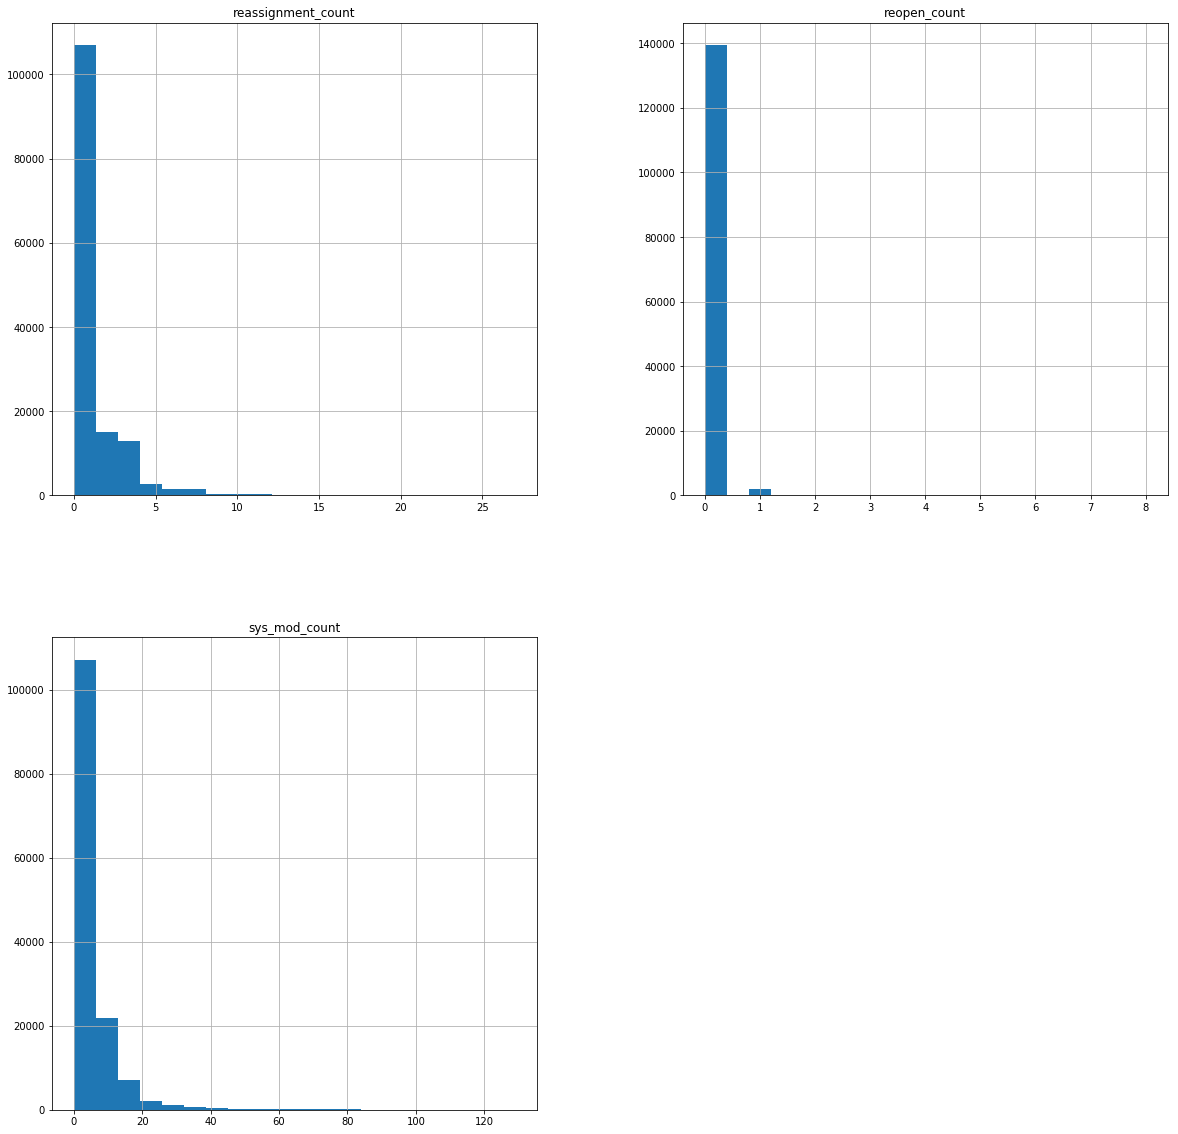

In [21]:
processed_data[numerical_parameters].hist(bins=20, figsize=(20, 20))

In [22]:
def outlier_detect_mean_std(data,col,threshold=3):
    Upper_fence = data[col].mean() + threshold * data[col].std()
    Lower_fence = data[col].mean() - threshold * data[col].std()   
    para = (Upper_fence, Lower_fence)   
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [23]:
def multi_mean_std_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_mean_std(data, col, threshold)        
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [24]:
outlier_indices, outlier_info = multi_mean_std_outlier(processed_data, numerical_parameters, threshold=3)
outlier_info.T

upper_fence  lower_fence  outliers_total  \
reassignment_count     6.308218    -4.099823          2705.0   
reopen_count           0.643825    -0.599989          2314.0   
sys_mod_count         28.122902   -17.961011          2555.0   

                    outliers_relative  
reassignment_count           0.019088  
reopen_count                 0.016329  
sys_mod_count                0.018030

In [25]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / (len(processed_data) * len(numerical_parameters)))

Общее количество выбросов:  6487
Общий процент выбросов:  1.5258646644838358


In [26]:
def outlier_detect_IQR(data,col,threshold=3):    
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    Lower_fence = data[col].quantile(0.25) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.75) + (IQR * threshold)
    para = (Upper_fence, Lower_fence)
    tmp = pd.concat([data[col]>Upper_fence,data[col]<Lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    #print('Количество выбросов в данных:',outlier_index.value_counts()[1])
    #print('Доля выбросов:',outlier_index.value_counts()[1]/len(outlier_index))
    return outlier_index, para

In [27]:
def multi_IQR_outlier(data, columns=[], threshold=3):
    if len(columns)==0:
        columns = data.columns.to_list()
    result = pd.DataFrame()
    outlier_indices = None
    outlier_fences = {k:[] for k in columns}
    for col in columns:        
        index, fences = outlier_detect_IQR(data, col, threshold)
        if len(index.value_counts()) > 1:            
            outliers_absolute_count = index.value_counts()[1]
        else:
            outliers_absolute_count = 0
        outliers_relative_count = outliers_absolute_count / len(index)
        if outlier_indices is None:
            outlier_indices = data[index].index
        else:
            outlier_indices = outlier_indices.union(data[index].index)
        outlier_fences[col].append(fences[0])
        outlier_fences[col].append(fences[1])
        outlier_fences[col].append(outliers_absolute_count)
        outlier_fences[col].append(outliers_relative_count)
    fences_df = pd.DataFrame(data=outlier_fences, index=['upper_fence', 'lower_fence', 'outliers_total', 'outliers_relative'])
    return outlier_indices, fences_df

In [28]:
outlier_indices, outlier_info = multi_IQR_outlier(processed_data, numerical_parameters, threshold=5)
outlier_info.T

upper_fence  lower_fence  outliers_total  \
reassignment_count          6.0         -5.0          2705.0   
reopen_count                0.0          0.0          2314.0   
sys_mod_count              31.0        -24.0          2088.0   

                    outliers_relative  
reassignment_count           0.019088  
reopen_count                 0.016329  
sys_mod_count                0.014734

In [29]:
print("Общее количество выбросов: ", len(outlier_indices))
print("Общий процент выбросов: ", len(outlier_indices) * 100. / (len(processed_data) * len(numerical_parameters)))

Общее количество выбросов:  6209
Общий процент выбросов:  1.4604738248466373


### Доля "выбросов" в численных параметрах небольшая - всего 1,5%. Оставим их без изменений.

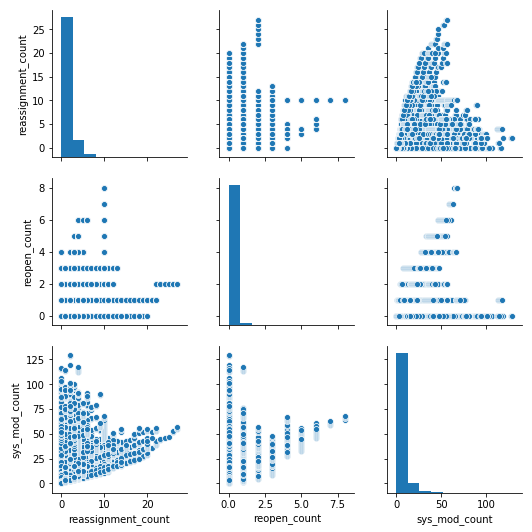

In [30]:
sns.pairplot(data=processed_data, vars=numerical_parameters)

In [31]:
corr_matrix = processed_data[numerical_parameters].corr()

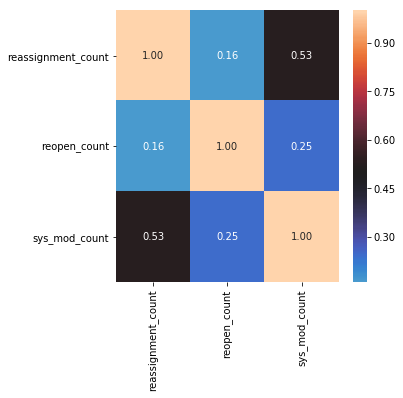

In [32]:
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', center = 0.5)

### Значительной корреляции численных параметров не выявлено.

## Масштабирование данных

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [34]:
scaler = MinMaxScaler().fit(processed_data)

In [35]:
scaled_data = pd.DataFrame(data=scaler.transform(processed_data), columns=processed_data.columns)
scaled_data.describe().T

count      mean       std  min       25%  \
number                   141712.0  0.470039  0.295298  0.0  0.202914   
incident_state           141712.0  0.226948  0.175843  0.0  0.000000   
active                   141712.0  0.176315  0.381090  0.0  0.000000   
reassignment_count       141712.0  0.040896  0.064247  0.0  0.000000   
reopen_count             141712.0  0.002740  0.025913  0.0  0.000000   
sys_mod_count            141712.0  0.039387  0.059540  0.0  0.007752   
made_sla                 141712.0  0.065026  0.246573  0.0  0.000000   
caller_id                141712.0  0.339398  0.255048  0.0  0.124142   
opened_by                141712.0  0.208584  0.175559  0.0  0.038462   
opened_at                141712.0  0.462439  0.293887  0.0  0.193470   
sys_updated_by           141712.0  0.067048  0.103277  0.0  0.003550   
sys_updated_at           141712.0  0.433238  0.283301  0.0  0.183132   
contact_type             141712.0  0.004116  0.045055  0.0  0.000000   
location                 141712.0  0.079048  0.153356  0.0  0.008929   
category                 141712.0  0.216001  0.157205  0.0  0.103448   
subcategory              141712.0  0.247432  0.195517  0.0  0.074803   
u_symptom                141712.0  0.189632  0.166446  0.0  0.099048   
impact                   141712.0  0.039739  0.178890  0.0  0.000000   
urgency                  141712.0  0.041062  0.181739  0.0  0.000000   
priority                 141712.0  0.041883  0.170731  0.0  0.000000   
assignment_group         141712.0  0.267512  0.170425  0.0  0.125000   
assigned_to              141712.0  0.260338  0.183458  0.0  0.112971   
knowledge                141712.0  0.821024  0.383333  0.0  1.000000   
u_priority_confirmation  141712.0  0.289122  0.453356  0.0  0.000000   
notify                   141712.0  0.000840  0.028966  0.0  0.000000   
closed_code              141712.0  0.262308  0.122508  0.0  0.235294   
resolved_by              141712.0  0.251786  0.195999  0.0  0.064815   
resolved_at              141712.0  0.455048  0.285710  0.0  0.202078   
closed_at                141712.0  0.265738  0.237993  0.0  0.084996   

                              50%       75%  max  
number                   0.454188  0.728739  1.0  
incident_state           0.250000  0.375000  1.0  
active                   0.000000  0.000000  1.0  
reassignment_count       0.037037  0.037037  1.0  
reopen_count             0.000000  0.000000  1.0  
sys_mod_count            0.023256  0.046512  1.0  
made_sla                 0.000000  0.000000  1.0  
caller_id                0.283753  0.507056  1.0  
opened_by                0.125000  0.365385  1.0  
opened_at                0.443722  0.717705  1.0  
sys_updated_by           0.040237  0.098225  1.0  
sys_updated_at           0.407240  0.672409  1.0  
contact_type             0.000000  0.000000  1.0  
location                 0.017857  0.053571  1.0  
category                 0.189655  0.293103  1.0  
subcategory              0.188976  0.401575  1.0  
u_symptom                0.099048  0.228571  1.0  
impact                   0.000000  0.000000  1.0  
urgency                  0.000000  0.000000  1.0  
priority                 0.000000  0.000000  1.0  
assignment_group         0.204545  0.386364  1.0  
assigned_to              0.221757  0.368201  1.0  
knowledge                1.000000  1.000000  1.0  
u_priority_confirmation  0.000000  1.000000  1.0  
notify                   0.000000  0.000000  1.0  
closed_code              0.235294  0.235294  1.0  
resolved_by              0.222222  0.361111  1.0  
resolved_at              0.432286  0.701012  1.0  
closed_at                0.179231  0.400961  1.0

## 2. Подбор параметров моделей кластеризации

## Mini batch K-Means
### Для сокращения времени вычислений используем модификацию Mini batch K Means.

In [36]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [37]:
#X = scaled_data.sample(n=40000, random_state=1812, )
X = scaled_data

In [38]:
import matplotlib.cm as cm
from scipy.spatial import distance

In [39]:
def inertia_samples(data, cluster_centers, labels):    
    # coordinates of centroid for each sample
    sample_centers = cluster_centers[labels]
    result = []
    for a,b in zip(data.to_numpy(), sample_centers):
        result.append(distance.sqeuclidean(a,b))
    return np.array(result)

Для k = 2 Средний коэффициент silhouette: 0.20703869803538602 , сумма квадратов дистанций : 156140.58843618332 
	относительная средняя дистанция:  0.1425440545416148
Для k = 3 Средний коэффициент silhouette: 0.2616670141187469 , сумма квадратов дистанций : 127050.0804690862 
	относительная средняя дистанция:  0.10195059204312061
Для k = 4 Средний коэффициент silhouette: 0.2209755268325751 , сумма квадратов дистанций : 110681.93239481396 
	относительная средняя дистанция:  0.10395926891242305
Для k = 5 Средний коэффициент silhouette: 0.24146273073734048 , сумма квадратов дистанций : 98525.6920983778 
	относительная средняя дистанция:  0.09174246312482093
Для k = 6 Средний коэффициент silhouette: 0.2505208356656932 , сумма квадратов дистанций : 93049.52333866438 
	относительная средняя дистанция:  0.08664911484303947
Для k = 7 Средний коэффициент silhouette: 0.19172219200192567 , сумма квадратов дистанций : 90963.55180614136 
	относительная средняя дистанция:  0.08940021832509151
Для k =

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 22 Средний коэффициент silhouette: 0.1288620540856617 , сумма квадратов дистанций : 63064.38788046456 
	относительная средняя дистанция:  0.08802022097354095


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 23 Средний коэффициент silhouette: 0.12426714815441066 , сумма квадратов дистанций : 61899.852944866114 
	относительная средняя дистанция:  0.07731084351471562


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 24 Средний коэффициент silhouette: 0.10451933316698478 , сумма квадратов дистанций : 63525.03368534803 
	относительная средняя дистанция:  0.09428172083217844


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 25 Средний коэффициент silhouette: 0.1264968691573861 , сумма квадратов дистанций : 60853.23636473449 
	относительная средняя дистанция:  0.06303555967622429


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 26 Средний коэффициент silhouette: 0.17211694965909888 , сумма квадратов дистанций : 60037.42989734301 
	относительная средняя дистанция:  0.08263672499891679


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 27 Средний коэффициент silhouette: 0.11588258291261153 , сумма квадратов дистанций : 61335.123611335715 
	относительная средняя дистанция:  0.06830401010765301


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 28 Средний коэффициент silhouette: 0.11536463485007006 , сумма квадратов дистанций : 58711.48757722724 
	относительная средняя дистанция:  0.060571257102569935


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 29 Средний коэффициент silhouette: 0.12461398415035738 , сумма квадратов дистанций : 57976.367346292514 
	относительная средняя дистанция:  0.06868324303769446


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 30 Средний коэффициент silhouette: 0.12532395301156543 , сумма квадратов дистанций : 57795.64532662816 
	относительная средняя дистанция:  0.0917445268659984


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 31 Средний коэффициент silhouette: 0.12641427039810504 , сумма квадратов дистанций : 57484.03966590113 
	относительная средняя дистанция:  0.08862368486875344


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 32 Средний коэффициент silhouette: 0.1171621662034473 , сумма квадратов дистанций : 56812.1642457274 
	относительная средняя дистанция:  0.07231179099995017


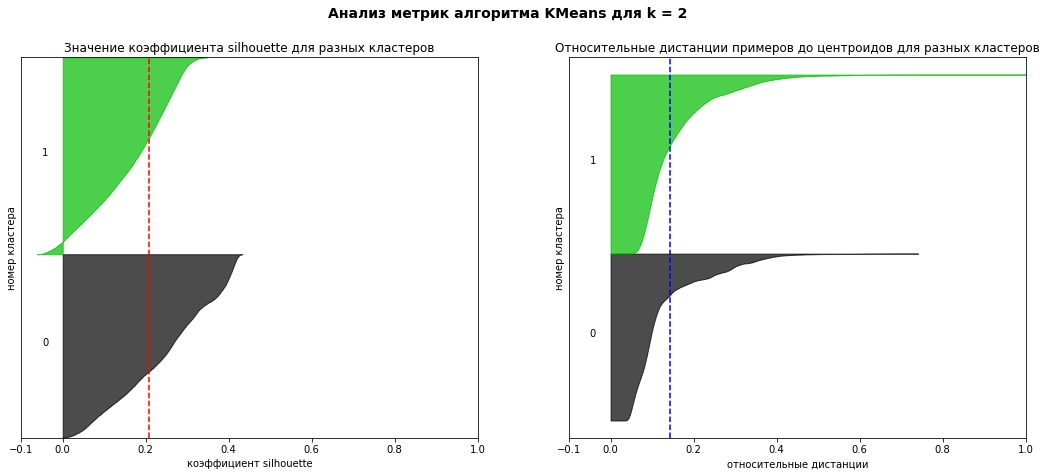

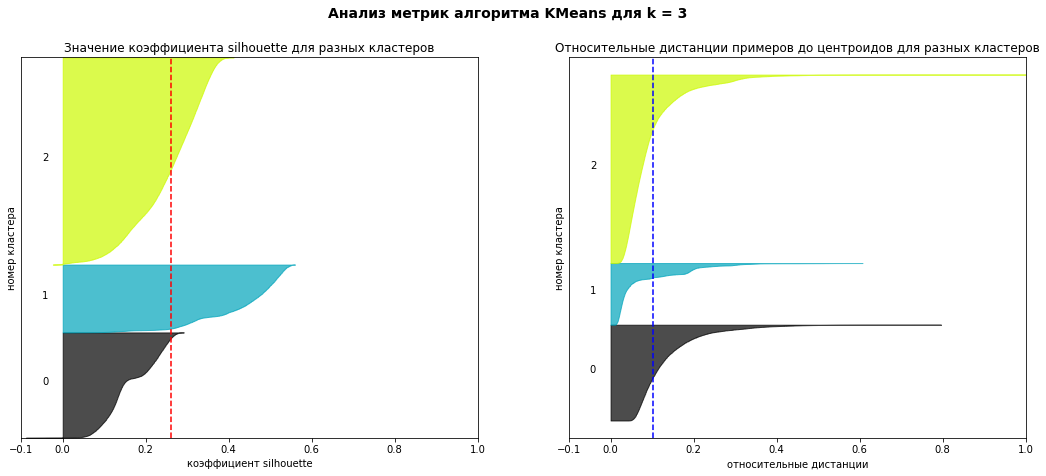

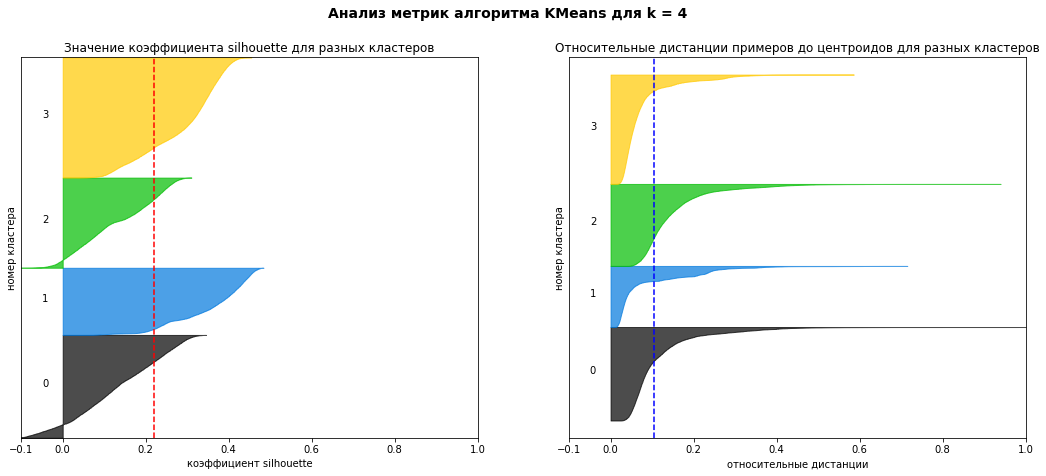

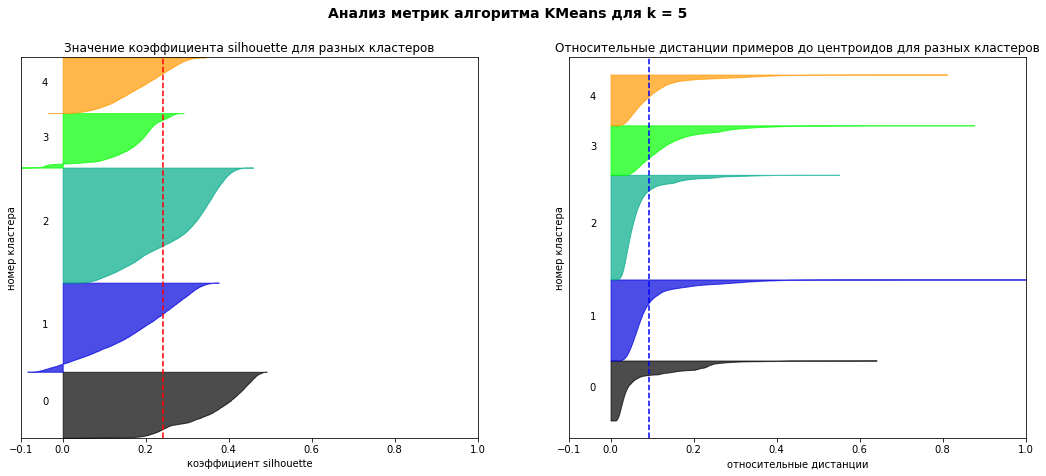

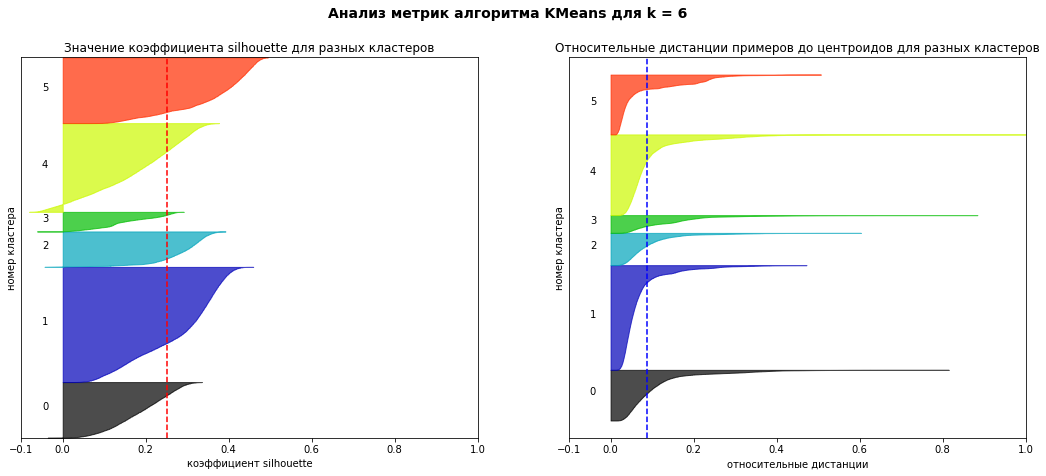

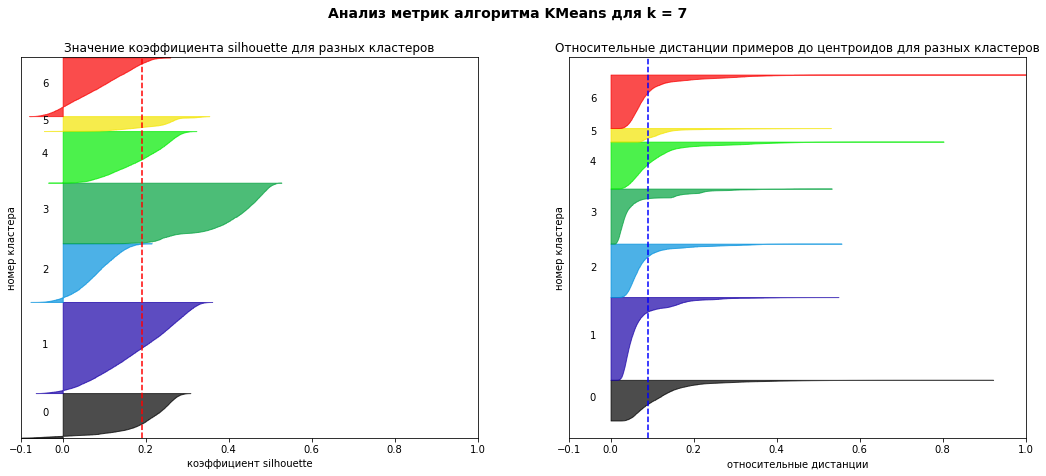

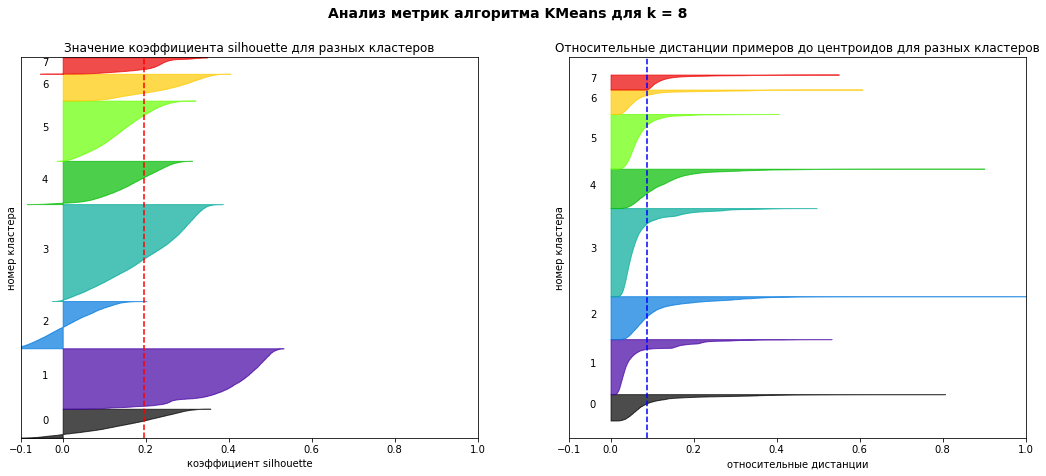

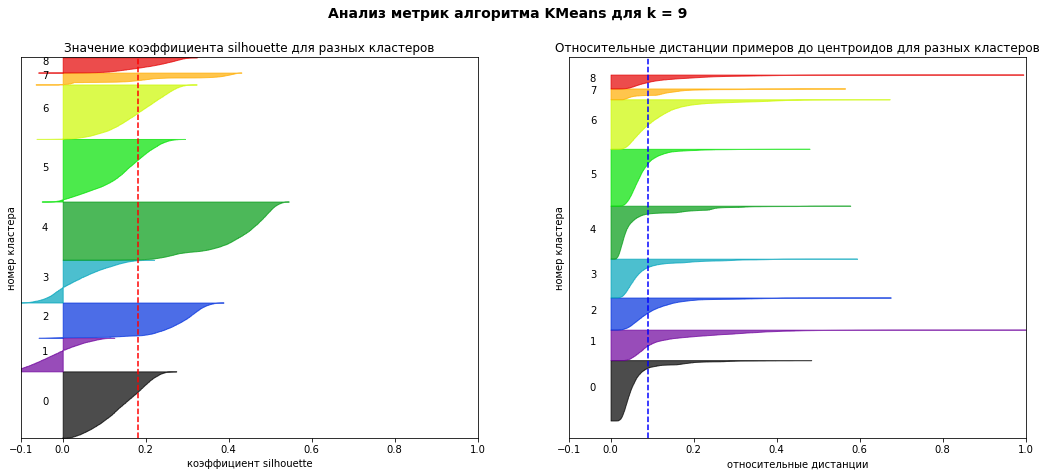

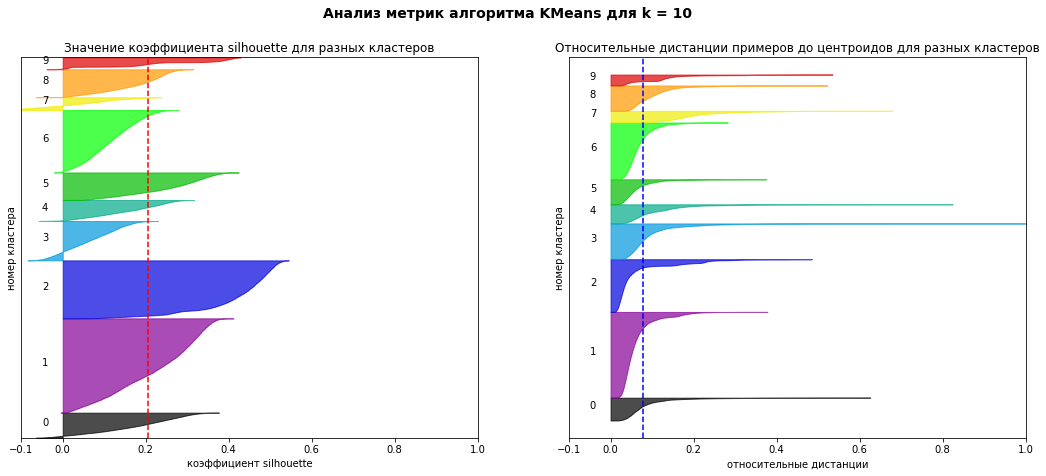

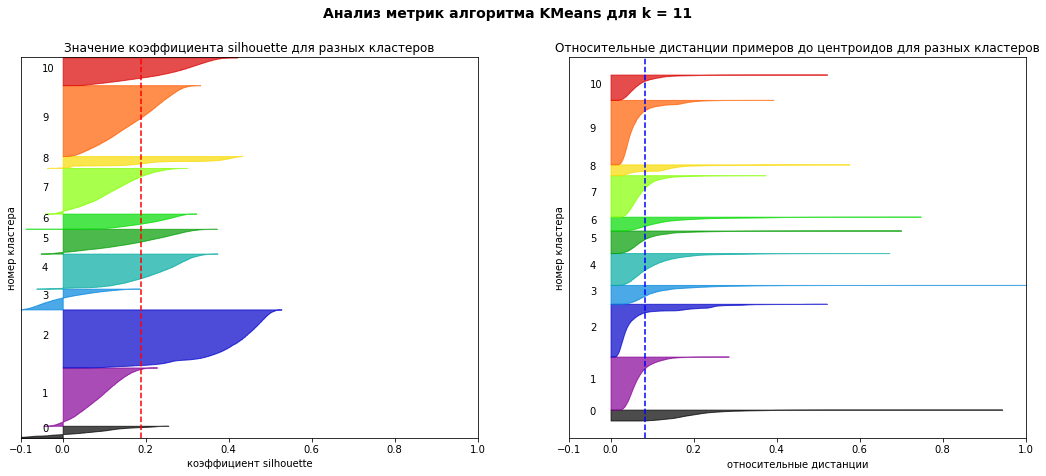

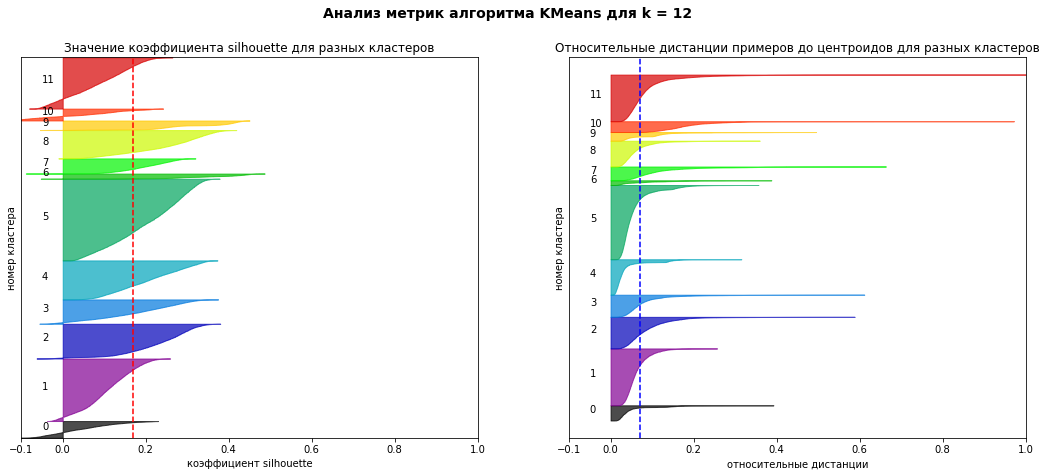

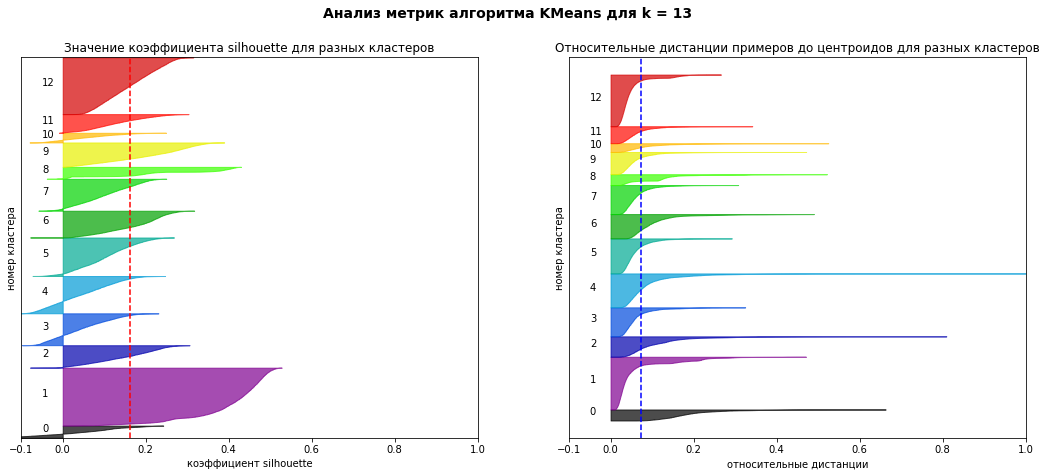

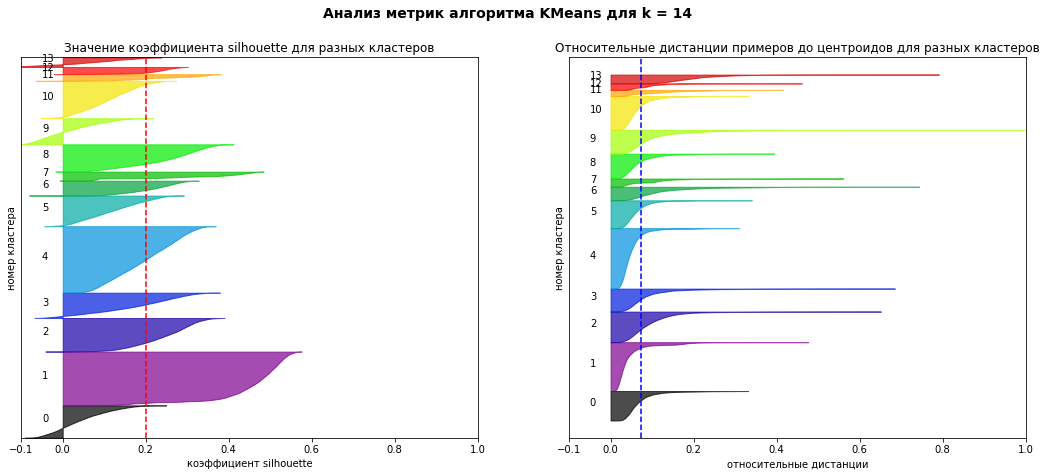

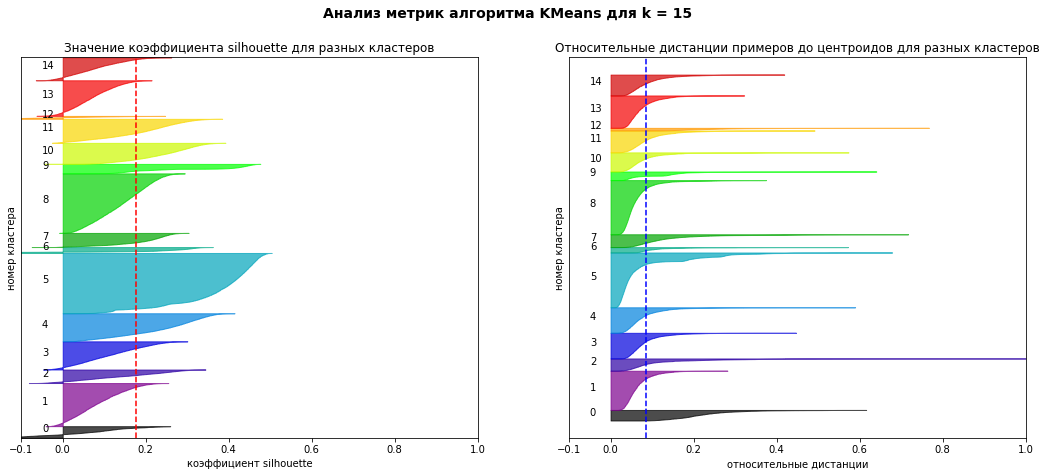

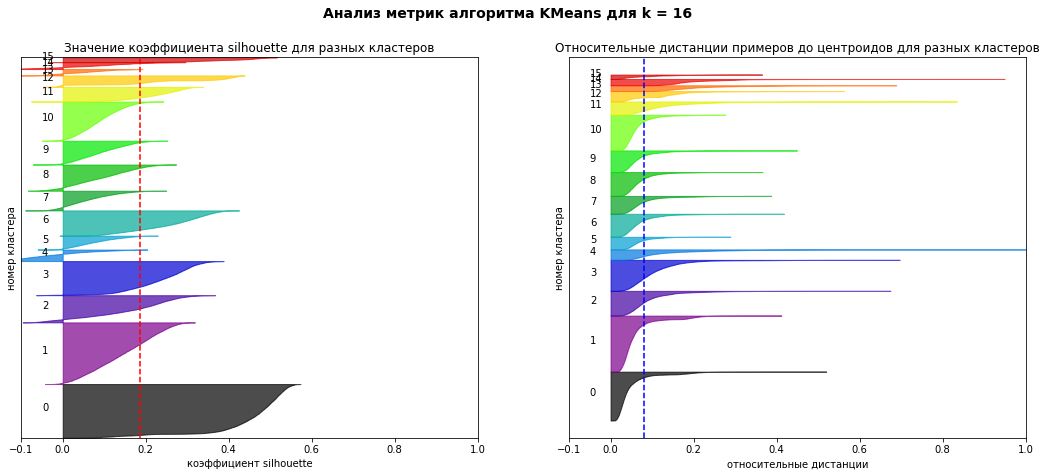

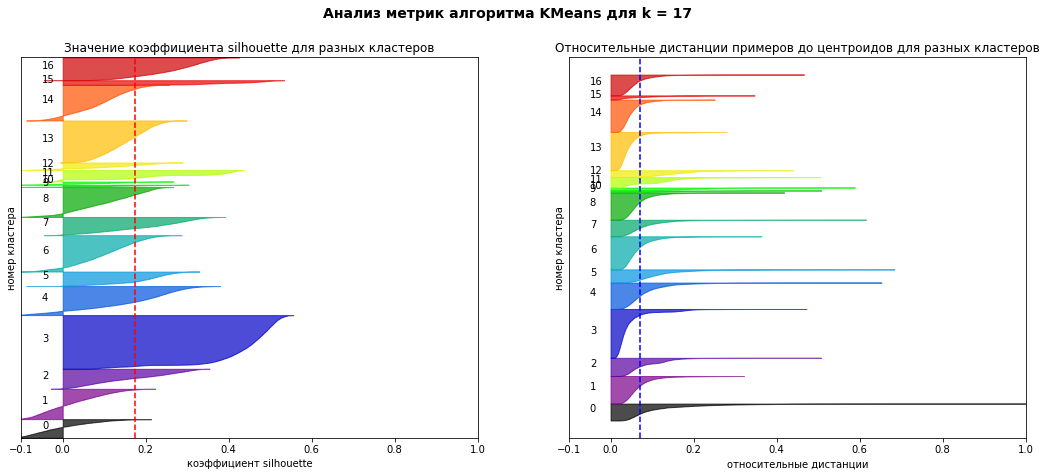

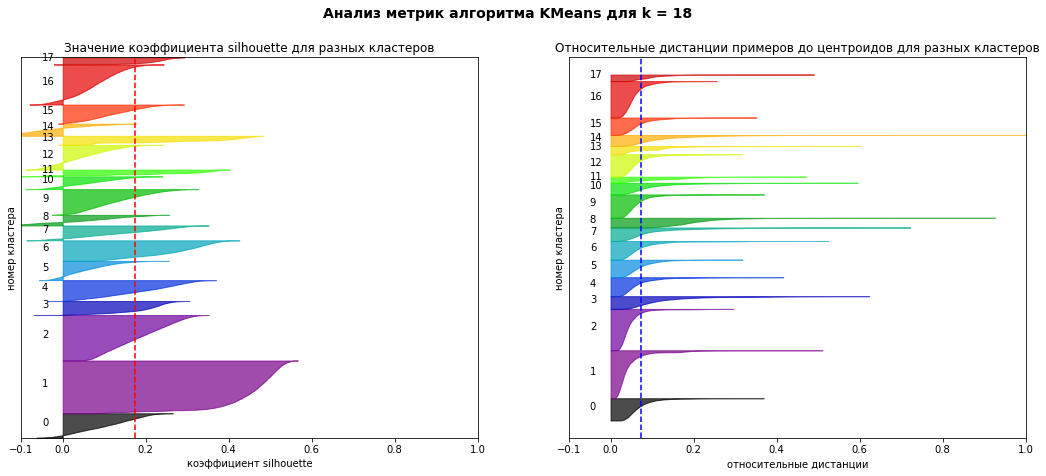

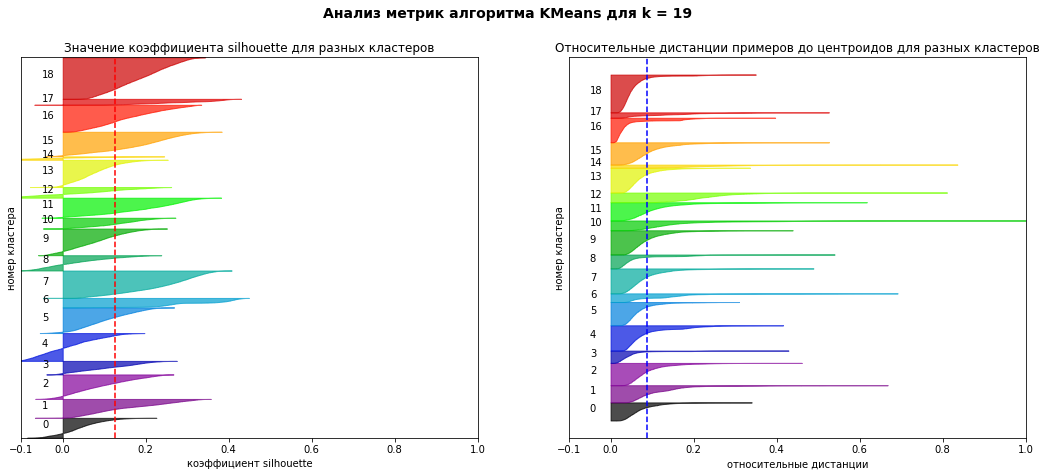

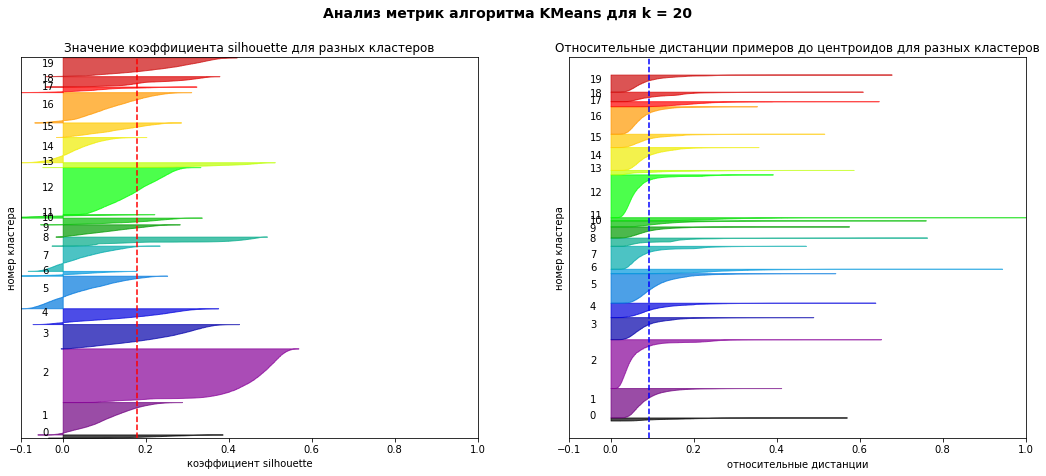

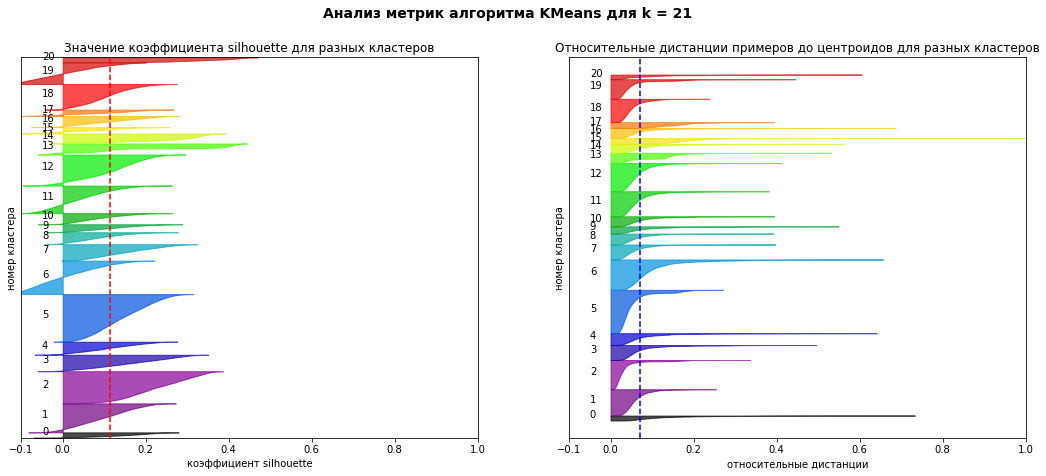

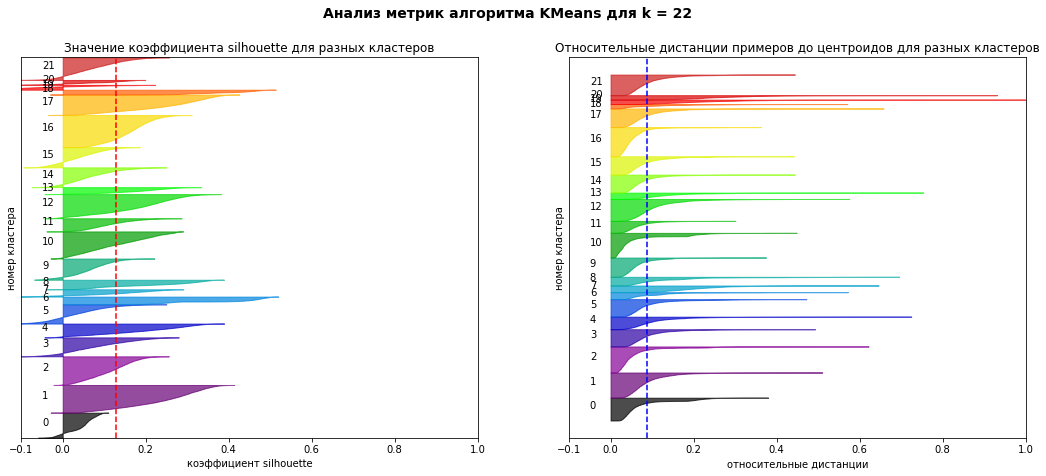

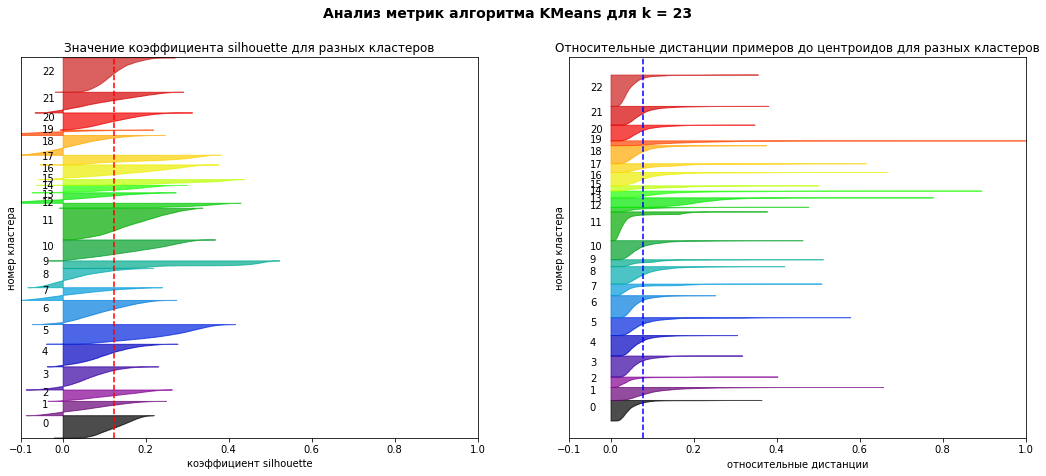

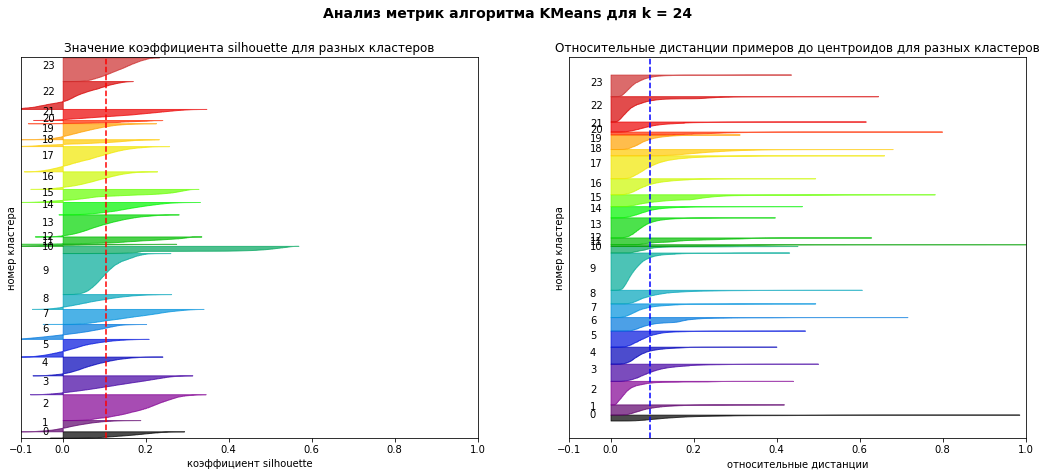

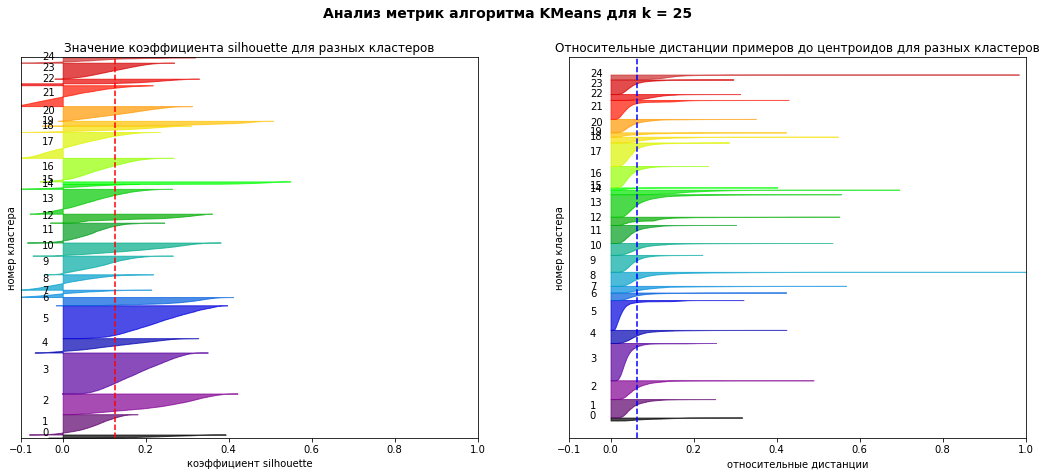

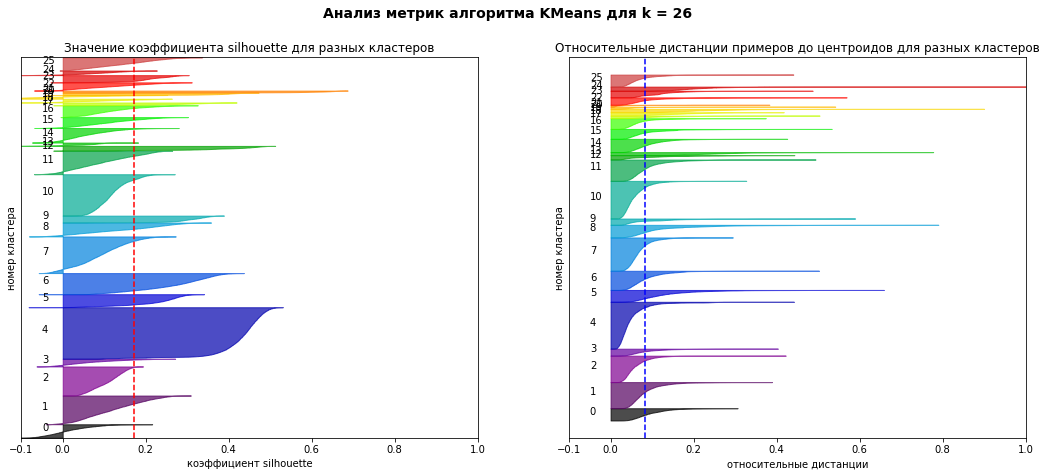

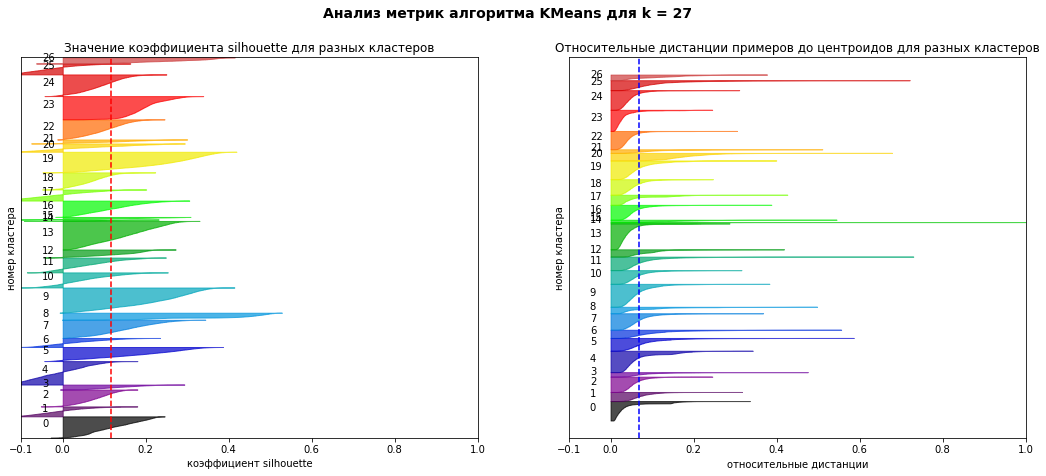

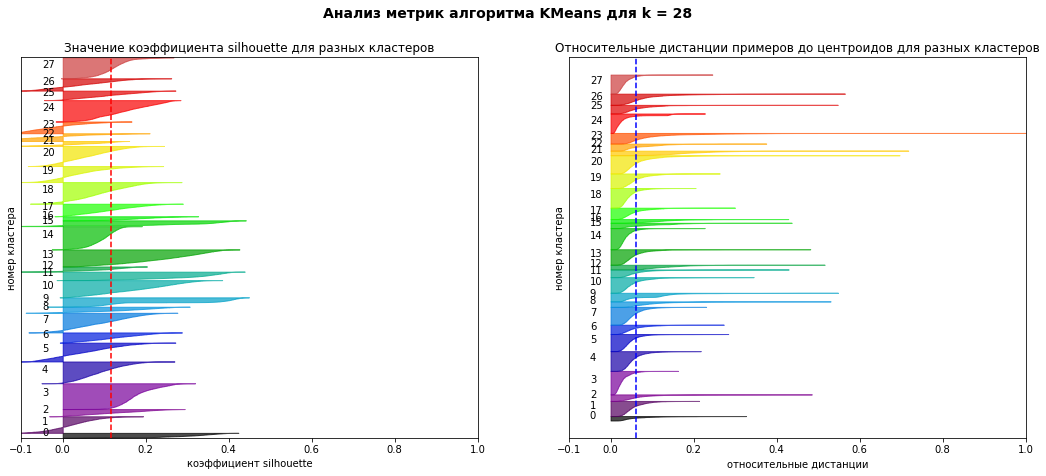

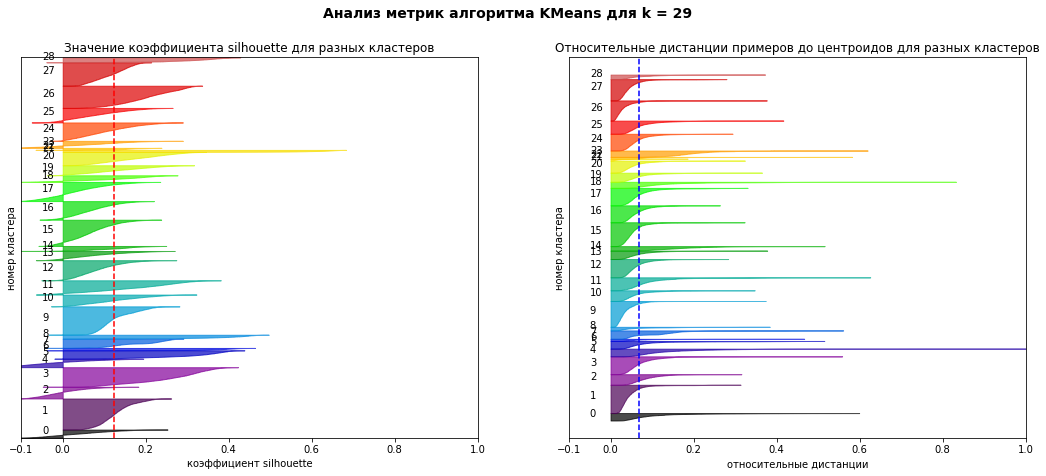

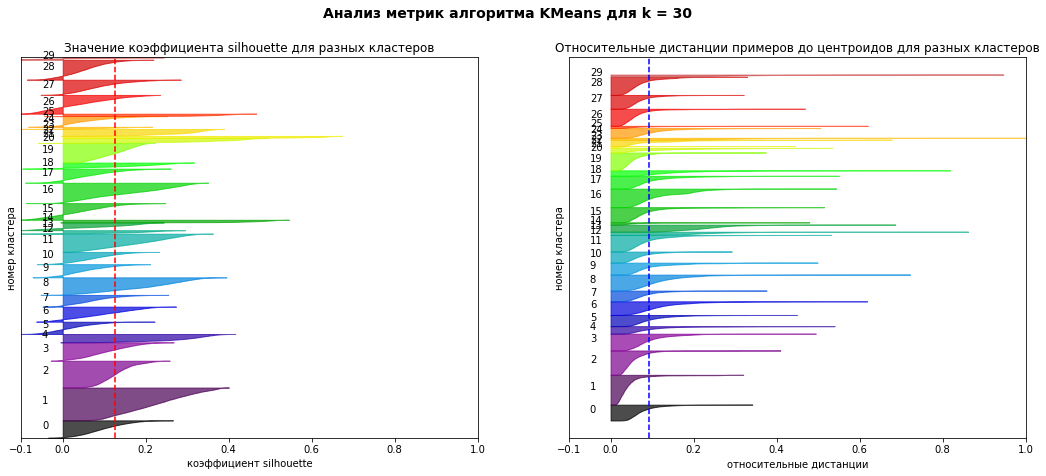

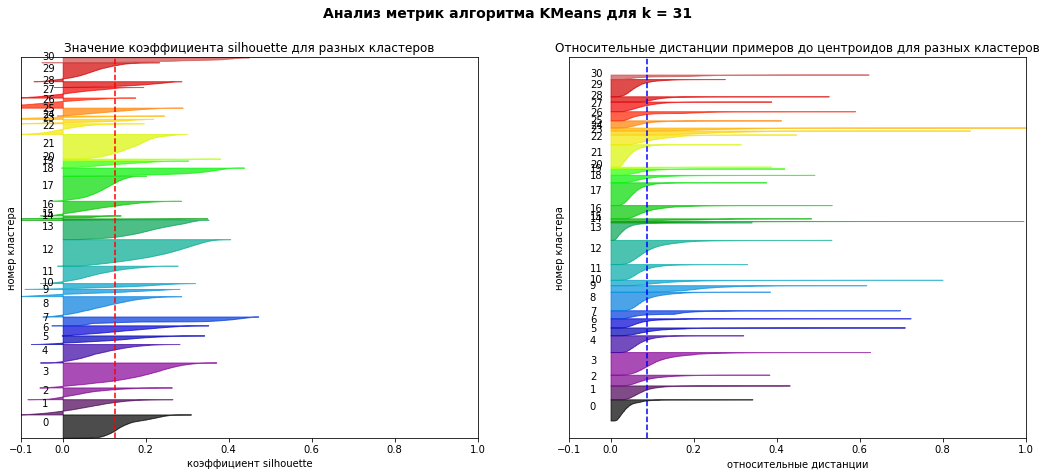

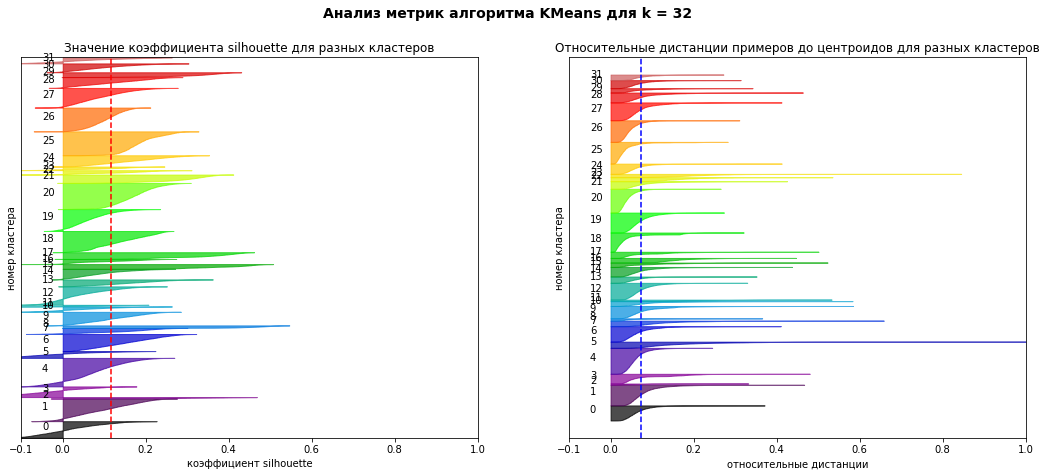

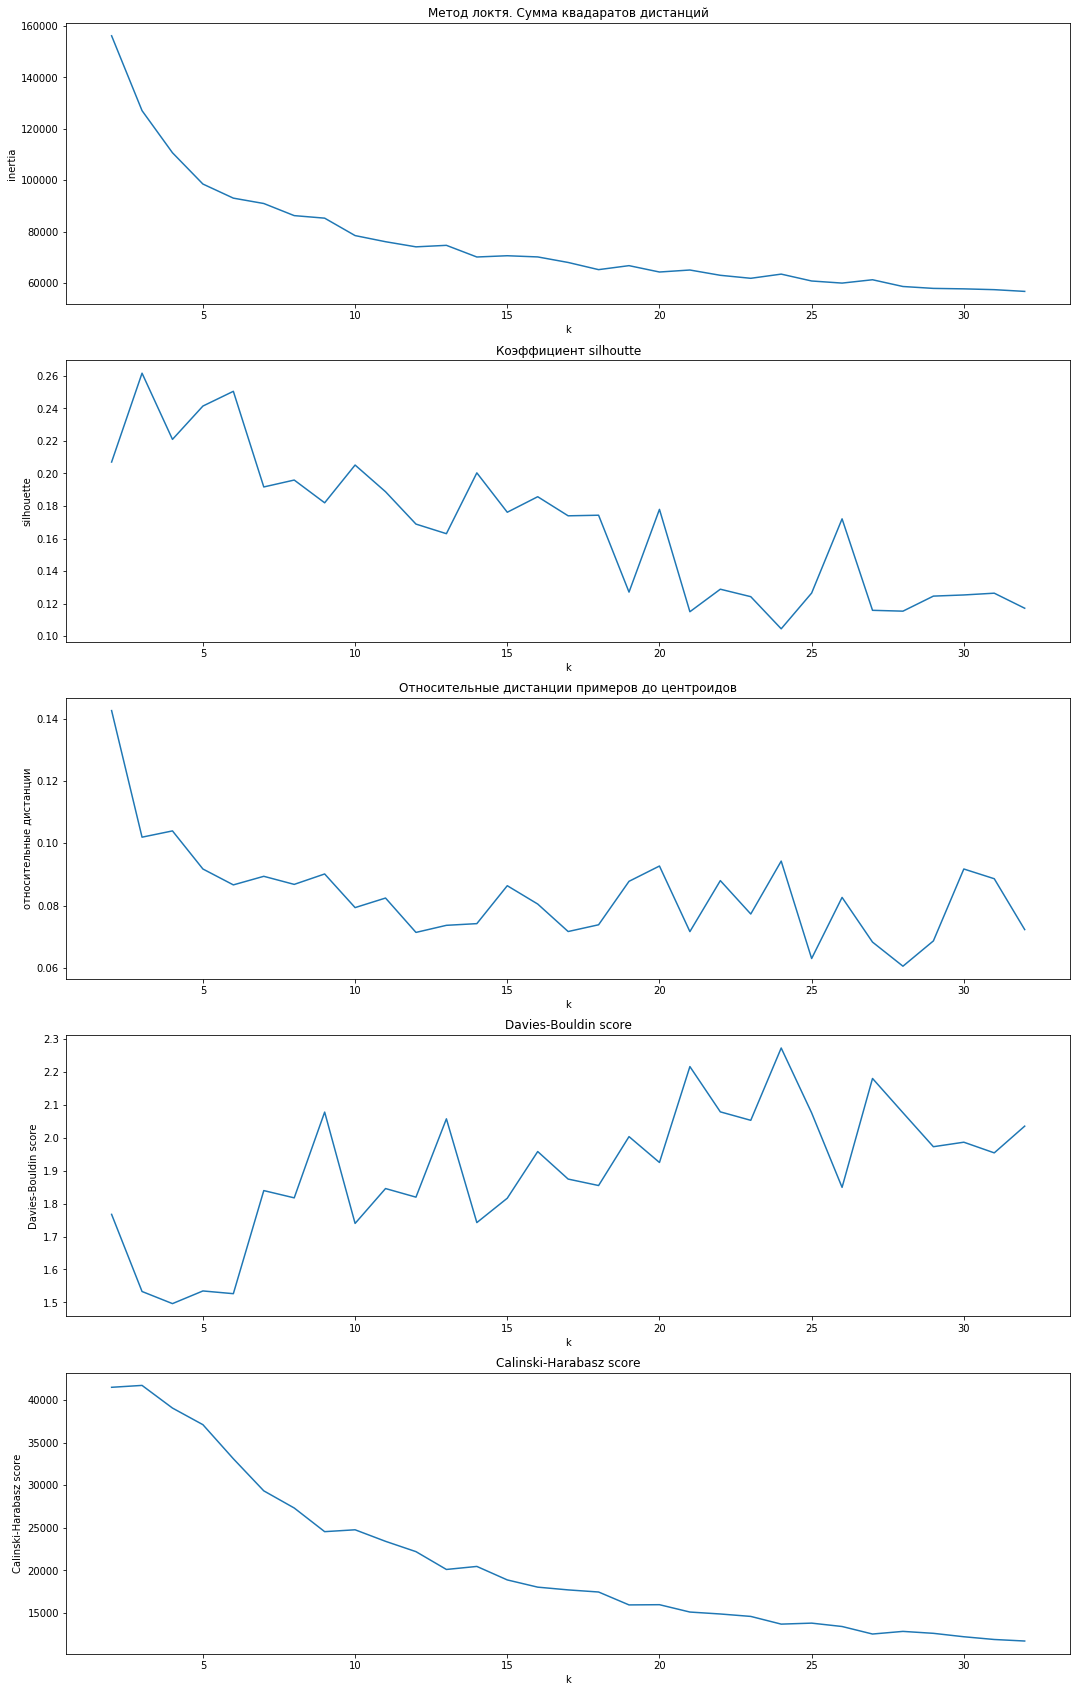

In [40]:
range_n_clusters = range(2, 33, 1)

silhouette_array = []
inertia_array = []
relative_distance_array = []
davies_bouldin_array = []
calinski_harabasz_array = []
for k in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(n_clusters=k, random_state=1812+k, batch_size=200, verbose=False)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    centroids = clusterer.cluster_centers_    
    sample_inertia_values = inertia_samples(X, centroids, cluster_labels)
    max_inertia = np.max(sample_inertia_values)
    avg_inertia = np.mean(sample_inertia_values)    
    dvs_bldn_csore = davies_bouldin_score(X, clusterer.labels_)
    clnsk_hrb_score = calinski_harabasz_score(X, clusterer.labels_)
    
    silhouette_array.append(silhouette_avg)
    inertia_array.append(clusterer.inertia_)
    relative_distance_array.append(avg_inertia / max_inertia)
    davies_bouldin_array.append(dvs_bldn_csore)
    calinski_harabasz_array.append(clnsk_hrb_score)
    
    print("Для k =", k,
          "Средний коэффициент silhouette:", silhouette_avg,
          ", сумма квадратов дистанций :", clusterer.inertia_,
          "\n\tотносительная средняя дистанция: ", avg_inertia/max_inertia
         )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Значение коэффициента silhouette для разных кластеров")
    ax1.set_xlabel("коэффициент silhouette")
    ax1.set_ylabel("номер кластера")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd plot showing inertia score
    
    # Compute the inertia scores for each sample    
    y_lower = 10    
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_inertia_values = \
            sample_inertia_values[cluster_labels == i]        
        
        if max_inertia > 0:
            ith_cluster_inertia_values /= max_inertia

        ith_cluster_inertia_values.sort()

        size_cluster_i = ith_cluster_inertia_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax2.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_inertia_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax2.set_xlim([0, 1])
    ax2.set_title("Относительные дистанции примеров до центроидов для разных кластеров")
    ax2.set_xlabel("относительные дистанции")
    ax2.set_ylabel("номер кластера")

    # The vertical line for average silhouette score of all the values    
    ax2.axvline(x=(avg_inertia/max_inertia), color="blue", linestyle="--")

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Анализ метрик алгоритма KMeans для k = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.set_size_inches(18, 30)

ax1.plot(range_n_clusters, inertia_array)
ax1.set_xlabel('k')
ax1.set_ylabel('inertia')
ax1.set_title('Метод локтя. Сумма квадаратов дистанций')

ax2.plot(range_n_clusters, silhouette_array)
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette')
ax2.set_title('Коэффициент silhoutte')

ax3.plot(range_n_clusters, relative_distance_array)
ax3.set_xlabel('k')
ax3.set_ylabel('относительные дистанции')
ax3.set_title('Относительные дистанции примеров до центроидов')

ax4.plot(range_n_clusters, davies_bouldin_array)
ax4.set_xlabel('k')
ax4.set_ylabel('Davies-Bouldin score')
ax4.set_title('Davies-Bouldin score')

ax5.plot(range_n_clusters, calinski_harabasz_array)
ax5.set_xlabel('k')
ax5.set_ylabel('Calinski-Harabasz score')
ax5.set_title('Calinski-Harabasz score')

plt.show()

### Оптимальное число кластеров: 3 и 6 - локальные максимумы на зависимости silhouette от количества кластеров.
### Зависимость оценки Calinski-Harabasz от числа кластеров имеет глобальный максимум при числе кластеров 3. Оценка основана на соотношениях внутрикластерных и межкластерных расстояний, большее её значение означает меньшие расстояние внутри кластеров и бОльшие расстояния между кдастерами, т.е. лучшее разбиение.
### Зависимость оценки Davies-Bouldin - мера "похожести" кластеров, её меньшее значение означает лучшую кластеризацию. Минимум достигается при количестве клвстеров 4, ближайший минимум - при количестве кластеров 6.

## Gaussian Mix

In [41]:
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture

In [42]:
#X = scaled_data.sample(n=20000, random_state=1812)
X = scaled_data

Для k = 2 Среднее логарифмическое правдоподобие:  5.932611029205387 , silhoutte:  0.1945730194272027
Для k = 3 Среднее логарифмическое правдоподобие:  9.459825501190478 , silhoutte:  0.137538084251126
Для k = 4 Среднее логарифмическое правдоподобие:  11.700721553306757 , silhoutte:  0.15759506136196685
Для k = 5 Среднее логарифмическое правдоподобие:  12.897446147529871 , silhoutte:  0.18438787682283161
Для k = 6 Среднее логарифмическое правдоподобие:  13.913598385858863 , silhoutte:  0.2162361416124215
Для k = 7 Среднее логарифмическое правдоподобие:  13.884154831906324 , silhoutte:  0.12191195746768696
Для k = 8 Среднее логарифмическое правдоподобие:  14.72112042212628 , silhoutte:  0.15931273115343578
Для k = 9 Среднее логарифмическое правдоподобие:  14.964568583551873 , silhoutte:  0.15115587516163015
Для k = 10 Среднее логарифмическое правдоподобие:  15.249053807638596 , silhoutte:  0.14249101131868344
Для k = 11 Среднее логарифмическое правдоподобие:  15.98588888542673 , silhoutt

C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 22 Среднее логарифмическое правдоподобие:  18.218759193747843 , silhoutte:  0.15266097691487582


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 23 Среднее логарифмическое правдоподобие:  18.34788697075953 , silhoutte:  0.1539713409785563


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 24 Среднее логарифмическое правдоподобие:  18.493682700992 , silhoutte:  0.15321760187715


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 25 Среднее логарифмическое правдоподобие:  18.651619594592827 , silhoutte:  0.15532745742977072


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 26 Среднее логарифмическое правдоподобие:  18.745321756891983 , silhoutte:  0.15356066765731544


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 27 Среднее логарифмическое правдоподобие:  18.799556062702504 , silhoutte:  0.1471642470026663


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 28 Среднее логарифмическое правдоподобие:  19.129881289767262 , silhoutte:  0.09283237457642665


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 29 Среднее логарифмическое правдоподобие:  19.230203288077924 , silhoutte:  0.09127776338536352


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 30 Среднее логарифмическое правдоподобие:  19.309718857747654 , silhoutte:  0.08700959459667096


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 31 Среднее логарифмическое правдоподобие:  19.470751865464504 , silhoutte:  0.0870920912147038


C:\Users\Supervisor\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Для k = 32 Среднее логарифмическое правдоподобие:  19.545394823833952 , silhoutte:  0.08096201790297299


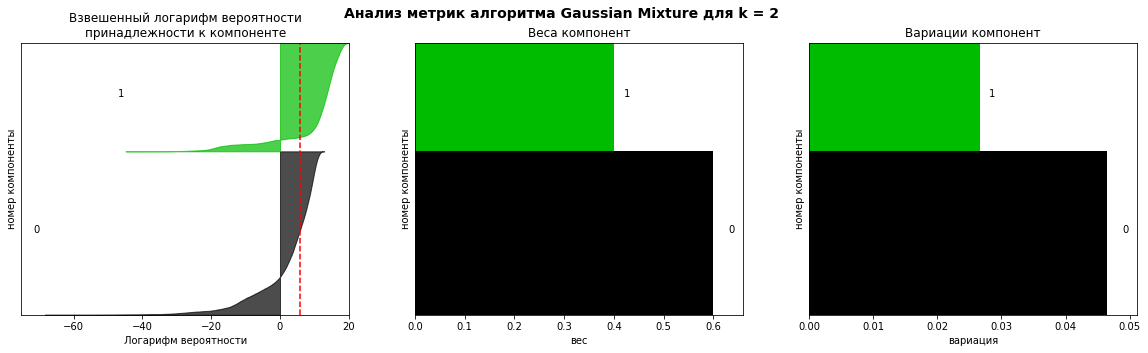

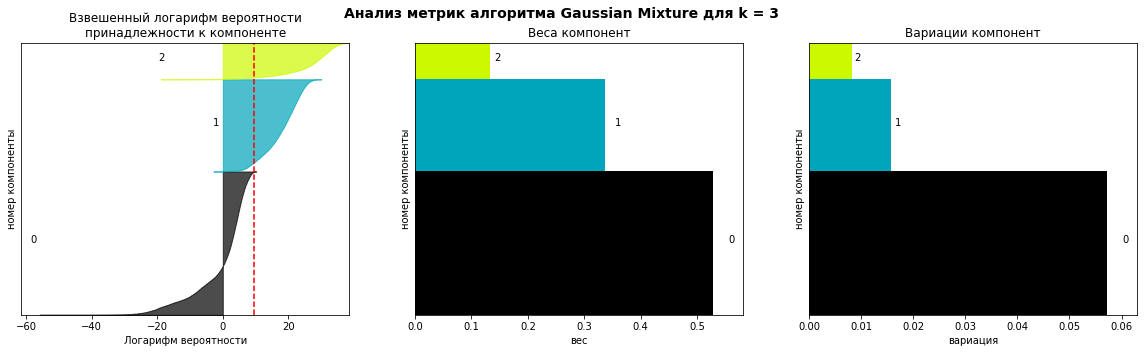

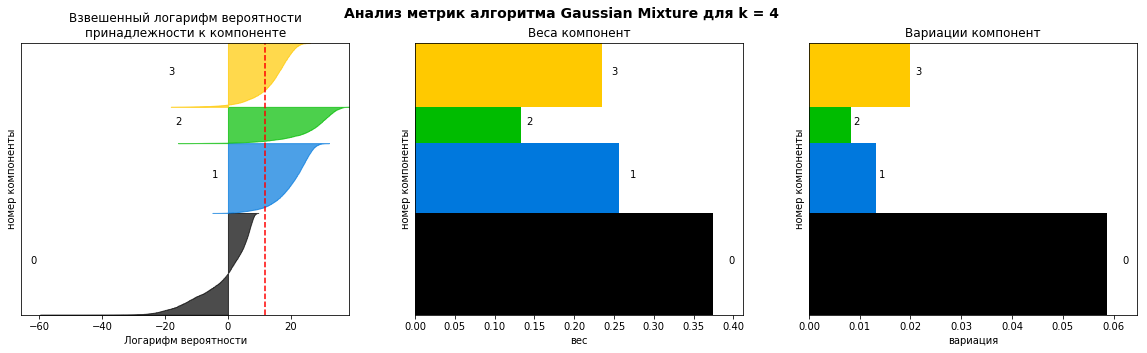

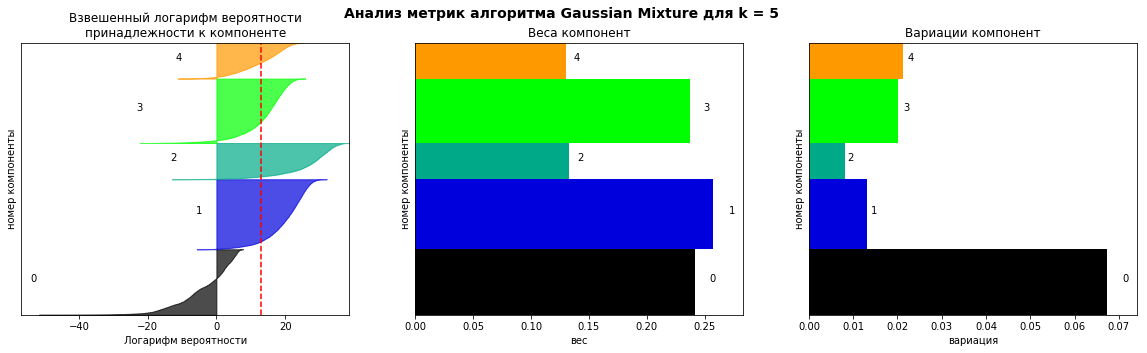

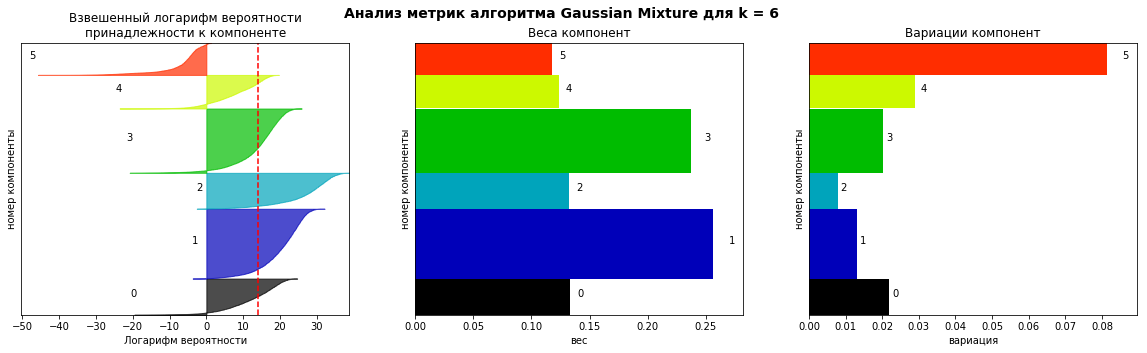

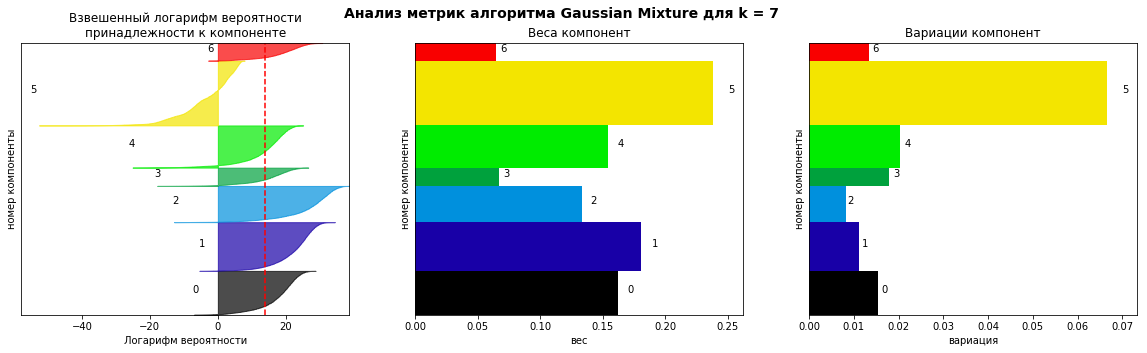

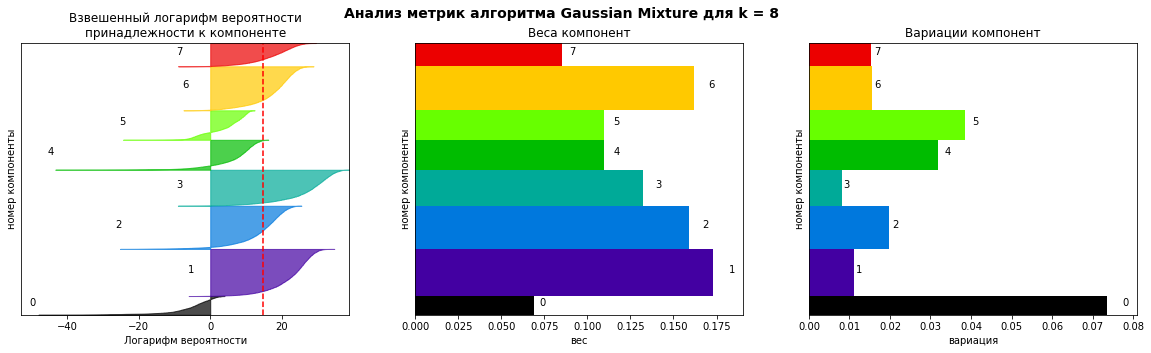

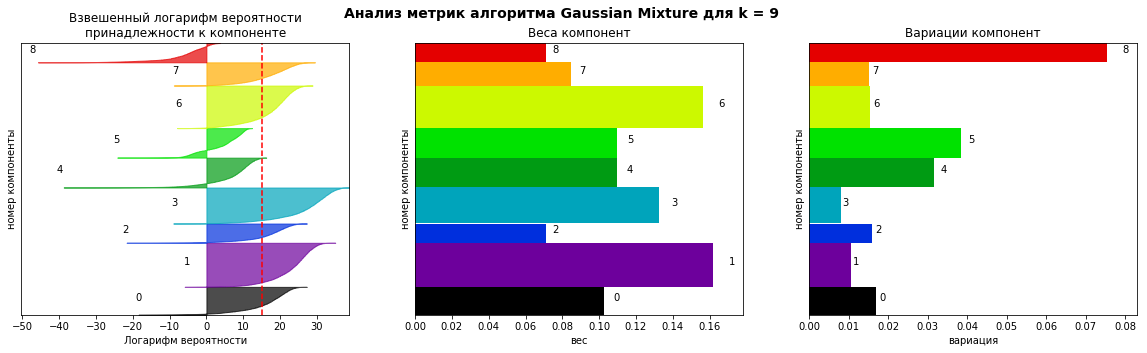

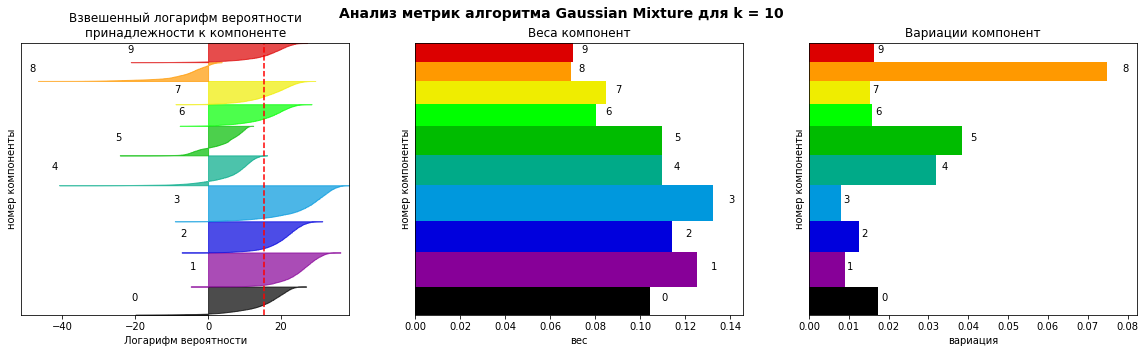

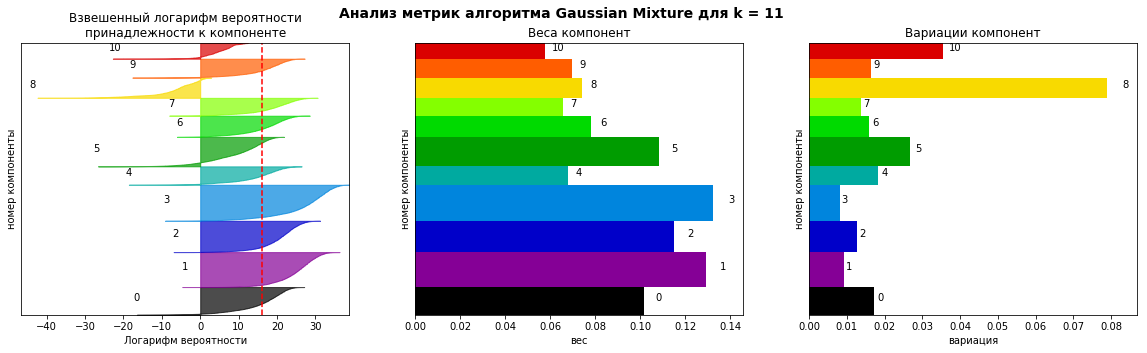

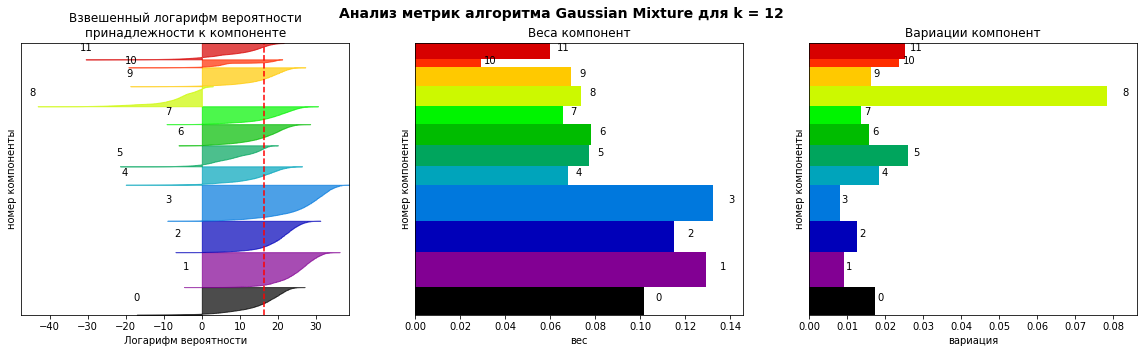

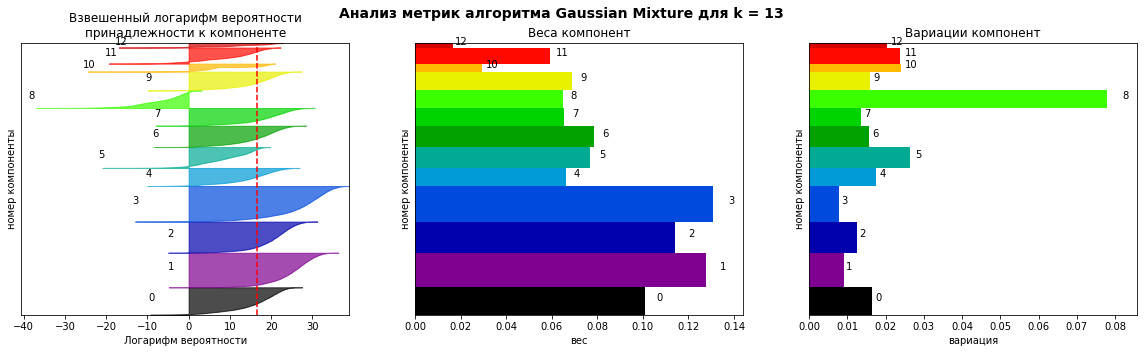

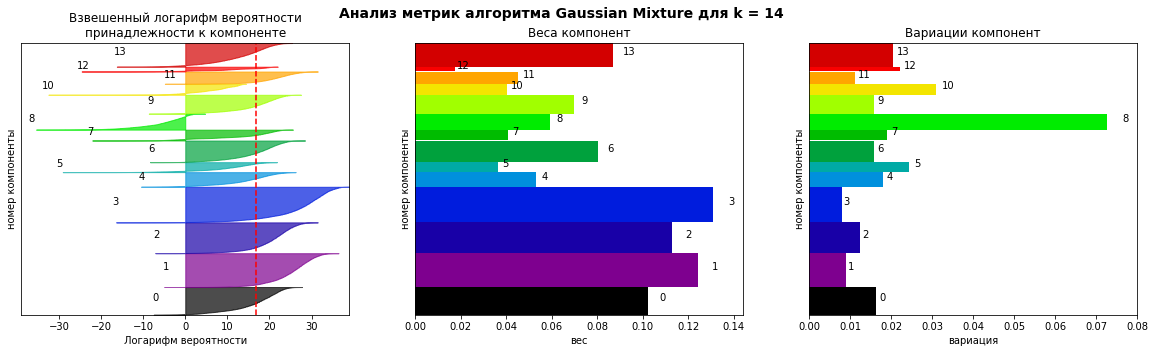

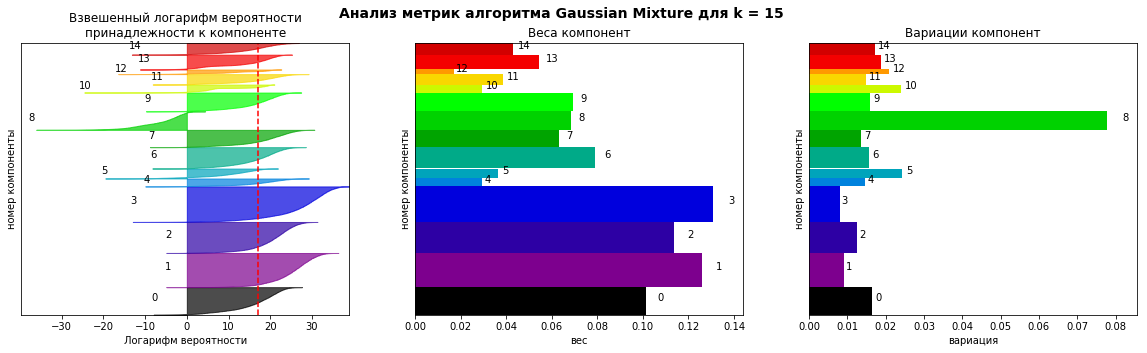

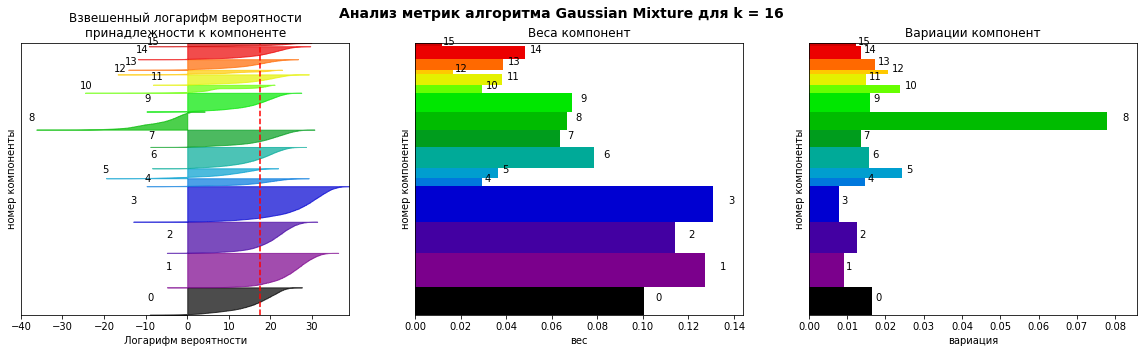

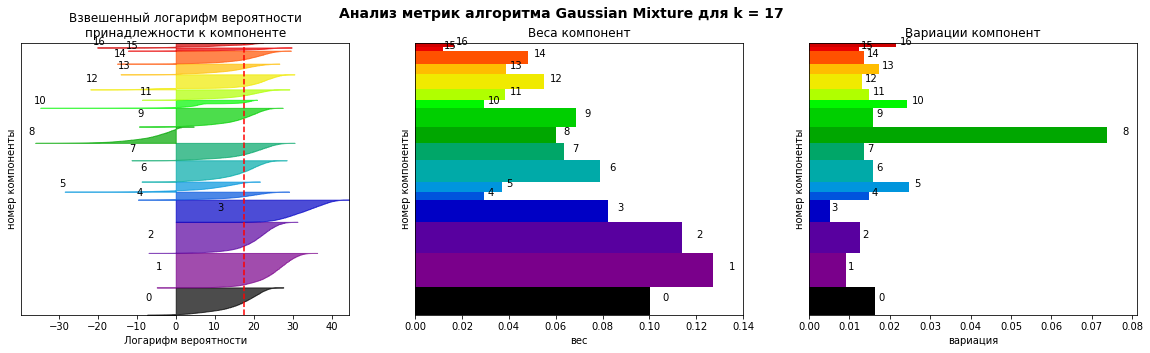

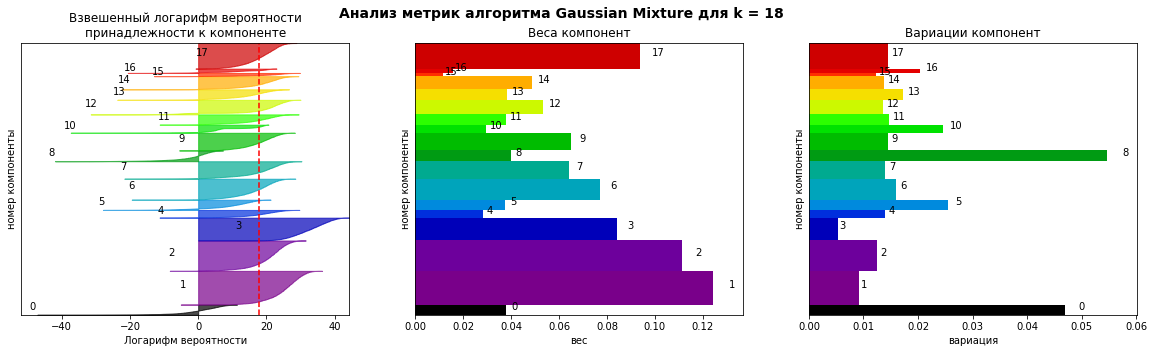

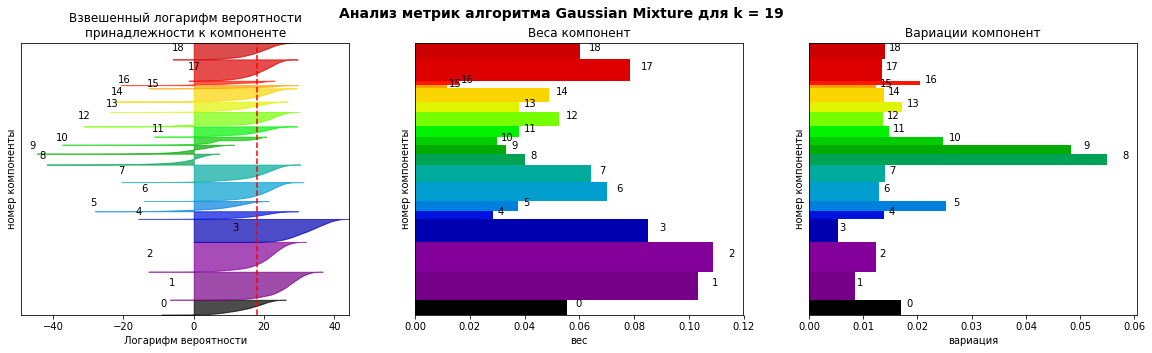

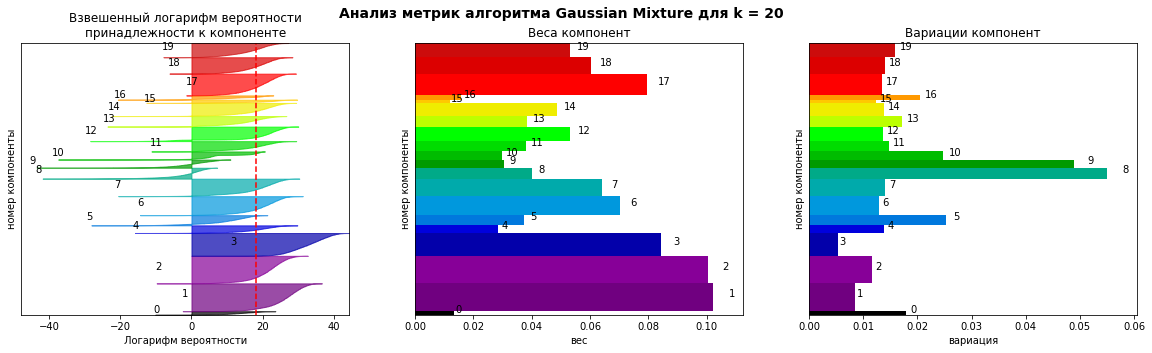

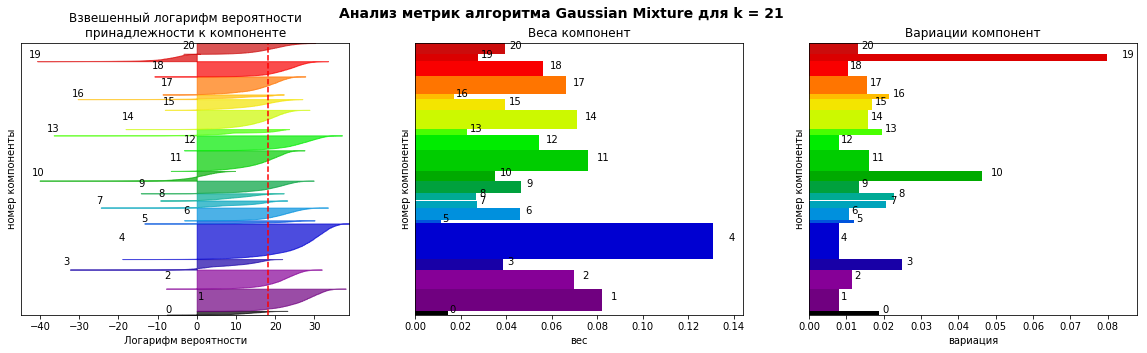

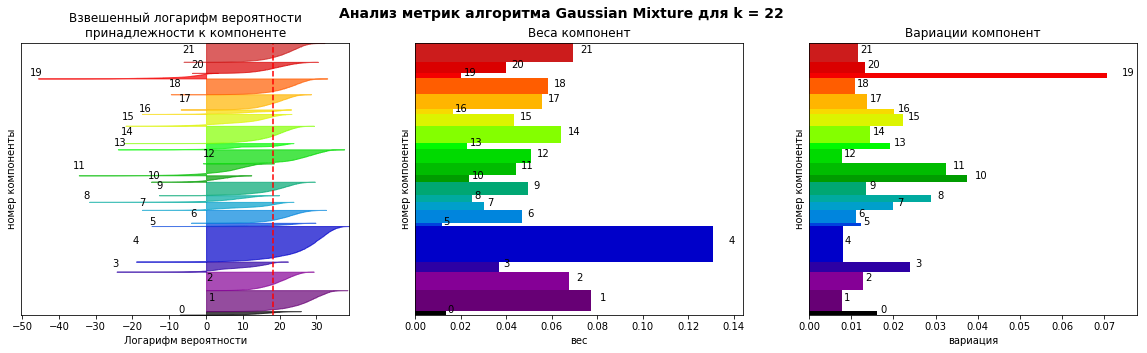

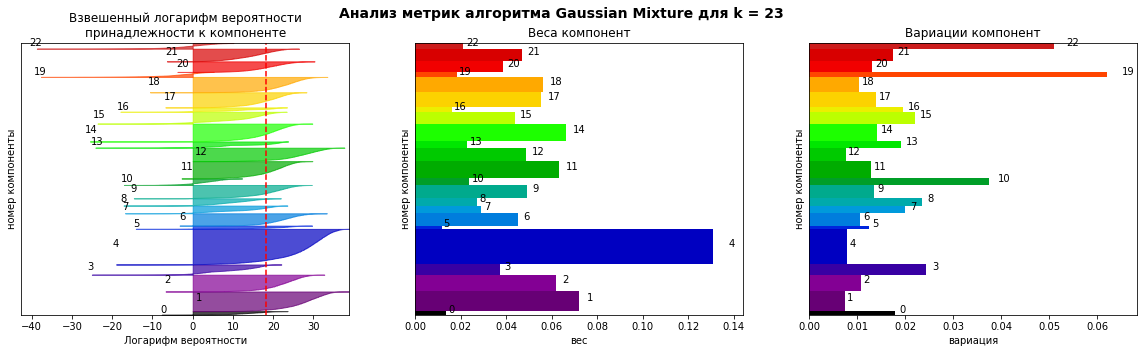

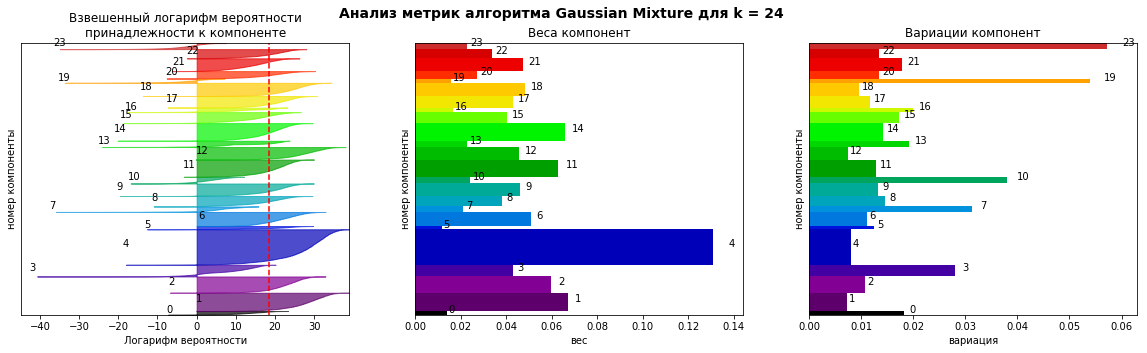

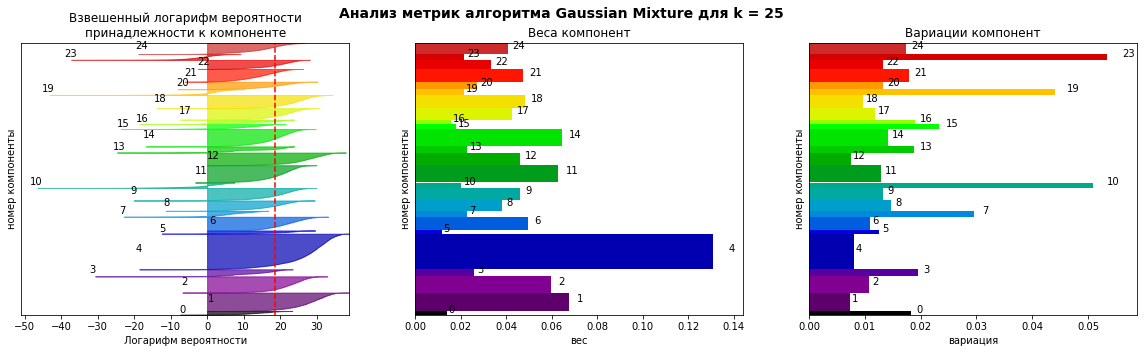

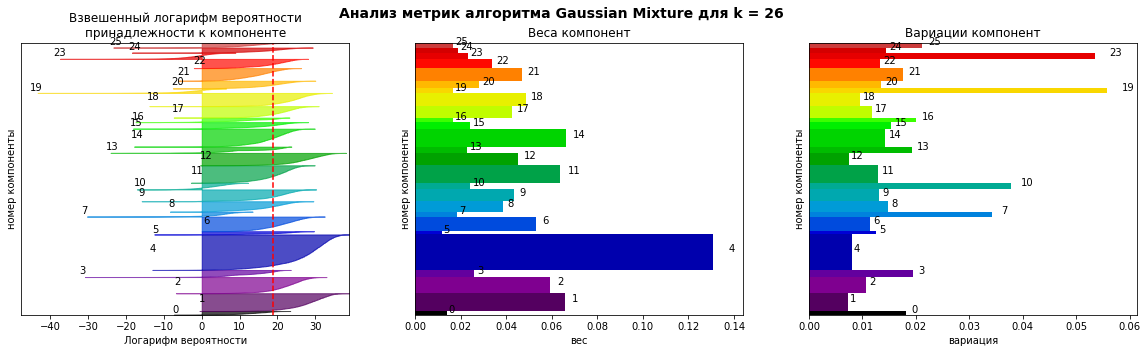

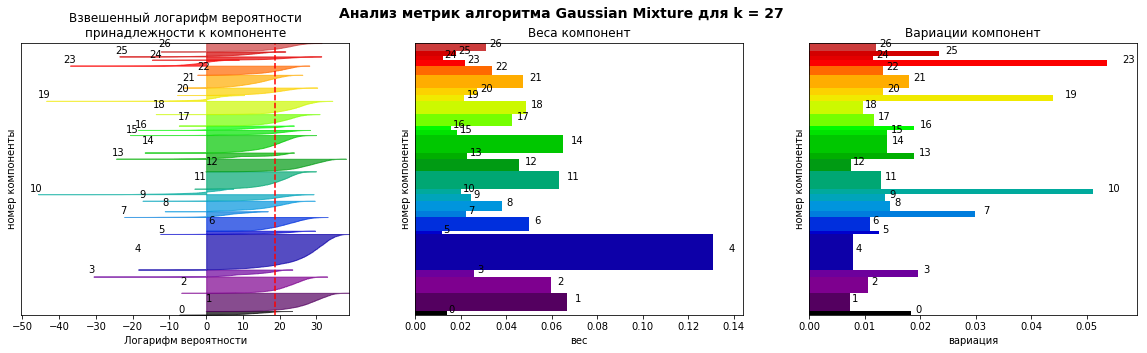

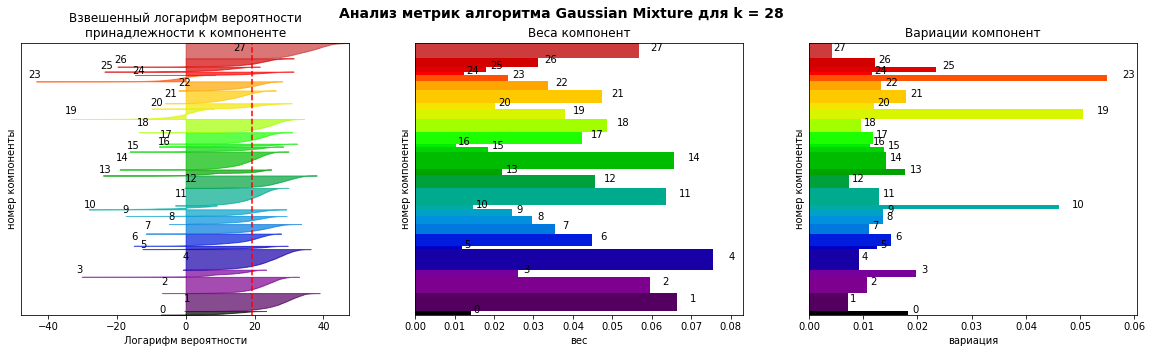

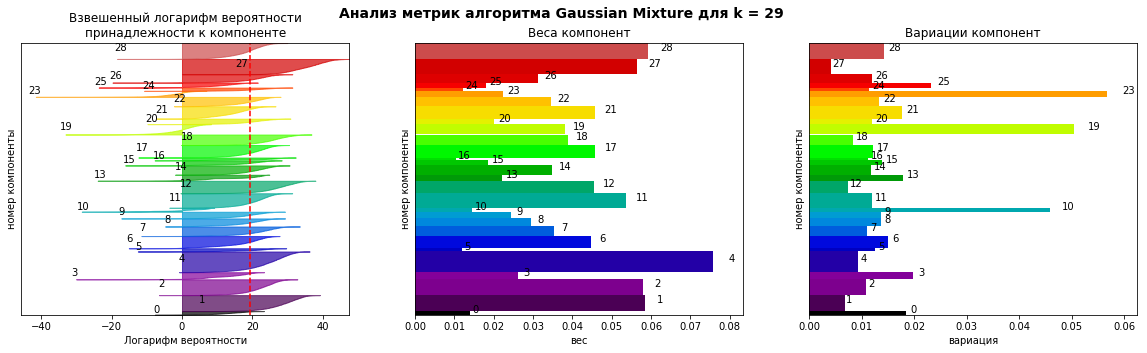

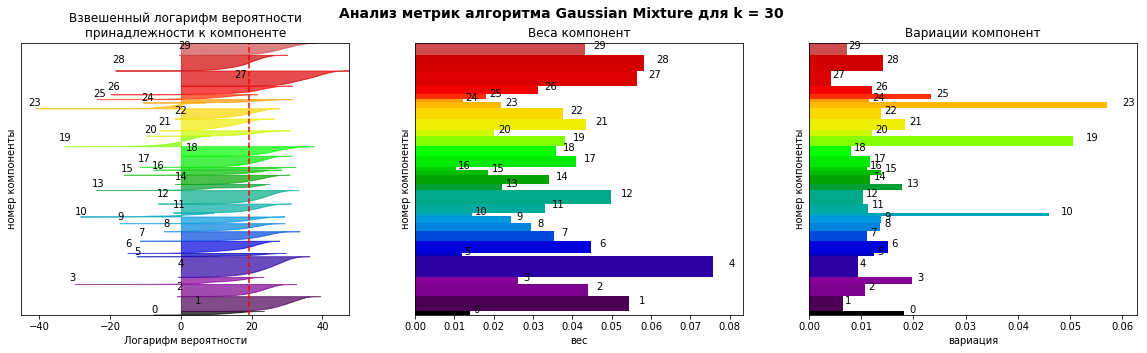

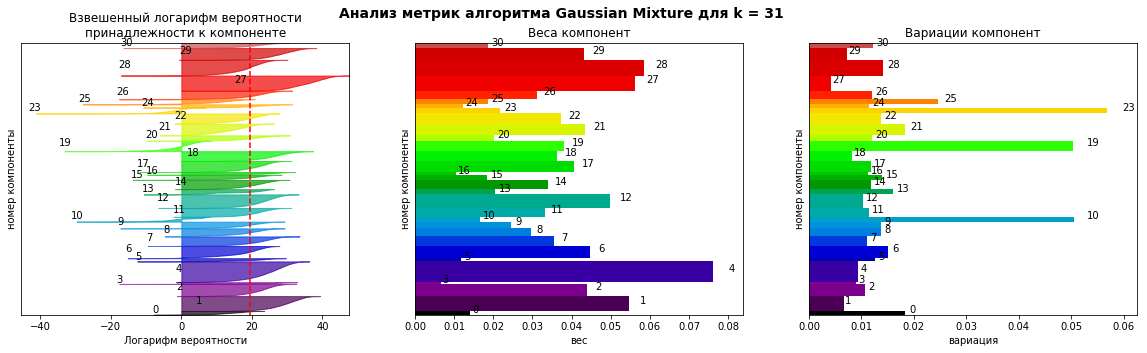

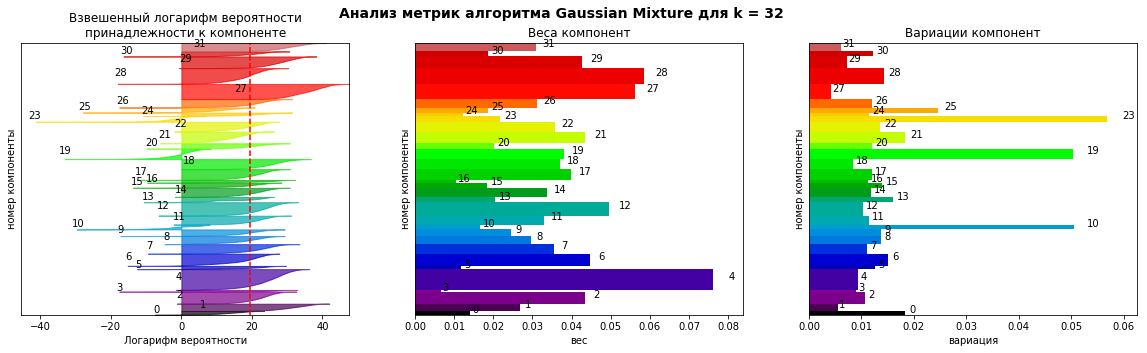

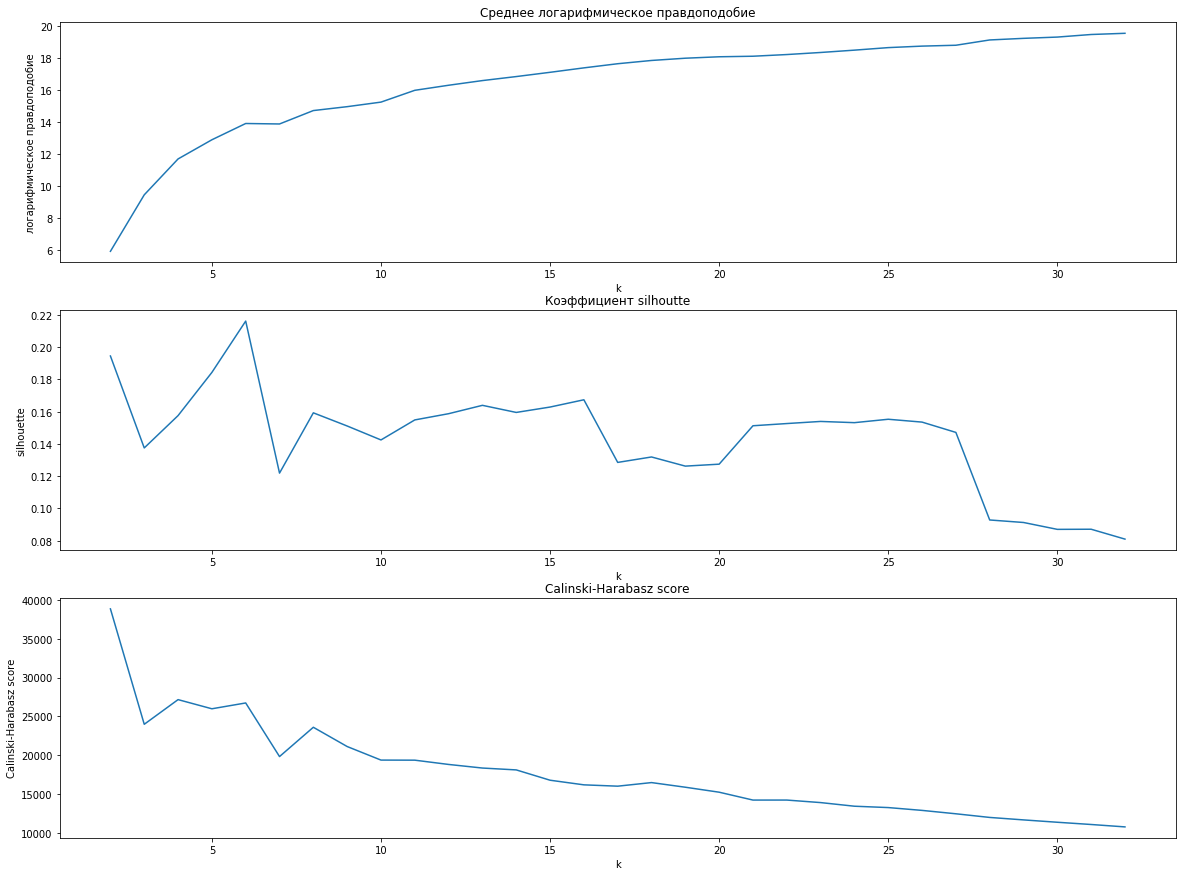

In [44]:
range_n_components = range(2, 33, 1)

score_array = []
silhouette_array = []
calinski_harabasz_array = []
for k in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(20, 5)        

    # Initialize the mixture model with n_components value and a random generator
    # seed of 1812 for reproducibility.
    mixture = GaussianMixture(n_components=k, random_state=1812, covariance_type='spherical')
    labels = mixture.fit_predict(X)

    # The score gives the average value of average log-likelihood for all the samples.
    ll_score = mixture.score(X)    
    # Compute the log probabilities for each sample
    sample_ll_scores = mixture.score_samples(X)
    
    # The weights of each mixture components.
    weights = mixture.weights_
    # The variance of each mixture component.
    variances = mixture.covariances_
    
    silhouette_avg = silhouette_score(X, labels)
    clnsk_hrb_score = calinski_harabasz_score(X, labels)
    
    silhouette_array.append(silhouette_avg)
    calinski_harabasz_array.append(clnsk_hrb_score)
    
    score_array.append(ll_score)
    
    print("Для k =", k,
          "Среднее логарифмическое правдоподобие: ", ll_score,
          ", silhoutte: ", silhouette_avg
         )

    # 1st plot showing log probabilities for each sample
    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_component_score_values = \
            sample_ll_scores[labels == i]

        ith_component_score_values.sort()

        size_component_i = ith_component_score_values.shape[0]
        y_upper = y_lower + size_component_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_component_score_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label plots with their cluster numbers at the middle
        ax1.text(1.05*ith_component_score_values.min(), y_lower + 0.5 * size_component_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_ylim([0, len(X) + (k + 1) * 10])
    ax1.set_xlim([1.1*sample_ll_scores.min(), sample_ll_scores.max()])
    ax1.set_title("Взвешенный логарифм вероятности\nпринадлежности к компоненте")
    ax1.set_xlabel("Логарифм вероятности")
    ax1.set_ylabel("номер компоненты")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=ll_score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    # 2nd plot showing component weights
    y_lower = 10    
    for i in range(k):
        # Bar plot of component weights
        ith_component_score_values = \
            sample_ll_scores[labels == i]

        size_component_i = ith_component_score_values.shape[0]
        y_upper = y_lower + size_component_i

        color = cm.nipy_spectral(float(i) / k)
        ax2.barh(y=y_lower, width=weights[i], height=size_component_i, align='edge', color=color)        

        # Label plots with their cluster numbers at the middle
        ax2.text(1.05*weights[i], y_lower + 0.5 * size_component_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax2.set_ylim([0, len(X) + (k + 1) * 10])
    ax2.set_xlim([0, 1.1*weights.max()])
    ax2.set_title("Веса компонент")
    ax2.set_xlabel("вес")
    ax2.set_ylabel("номер компоненты")    

    ax2.set_yticks([])  # Clear the yaxis labels / ticks
    #ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    # 3rd plot showing component variances
    y_lower = 10    
    for i in range(k):
        # Bar plot of component variances
        ith_component_score_values = \
            sample_ll_scores[labels == i]

        size_component_i = ith_component_score_values.shape[0]
        y_upper = y_lower + size_component_i

        color = cm.nipy_spectral(float(i) / k)
        ax3.barh(y=y_lower, width=variances[i], height=size_component_i, align='edge', color=color)        

        # Label plots with their cluster numbers at the middle
        ax3.text(1.05*variances[i], y_lower + 0.5 * size_component_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax3.set_ylim([0, len(X) + (k + 1) * 10])
    ax3.set_xlim([0, 1.1*variances.max()])
    ax3.set_title("Вариации компонент")
    ax3.set_xlabel("вариация")
    ax3.set_ylabel("номер компоненты")    

    ax3.set_yticks([])  # Clear the yaxis labels / ticks
    #ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    

    plt.suptitle(("Анализ метрик алгоритма Gaussian Mixture для k = %d" % k),
                 fontsize=14, fontweight='bold')

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(20, 15)


ax1.plot(range_n_components, score_array)
ax1.set_xlabel('k')
ax1.set_ylabel('логарифмическое правдоподобие')
ax1.set_title('Среднее логарифмическое правдоподобие')

ax2.plot(range_n_clusters, silhouette_array)
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette')
ax2.set_title('Коэффициент silhoutte')

ax3.plot(range_n_clusters, calinski_harabasz_array)
ax3.set_xlabel('k')
ax3.set_ylabel('Calinski-Harabasz score')
ax3.set_title('Calinski-Harabasz score')

plt.show()

### Максимум значения silhouette достгается при числе кдастеров 6.
### Максимумы критерия Calinski-Harabasz - при числе кластеров 4 и 6.

Для k = 2 Значение критерия Davies-Bouldin:  1.7398485822022134
Для k = 3 Значение критерия Davies-Bouldin:  1.9353099894544175
Для k = 4 Значение критерия Davies-Bouldin:  1.6451265756902946
Для k = 5 Значение критерия Davies-Bouldin:  1.7853800133831712
Для k = 6 Значение критерия Davies-Bouldin:  1.9732421089056045
Для k = 7 Значение критерия Davies-Bouldin:  1.9101155232495668
Для k = 8 Значение критерия Davies-Bouldin:  1.8374799884440292
Для k = 9 Значение критерия Davies-Bouldin:  1.975659946231507
Для k = 10 Значение критерия Davies-Bouldin:  2.0118216771797726
Для k = 11 Значение критерия Davies-Bouldin:  1.9639913588421116
Для k = 12 Значение критерия Davies-Bouldin:  1.9582921000120581
Для k = 13 Значение критерия Davies-Bouldin:  1.9383913311252656
Для k = 14 Значение критерия Davies-Bouldin:  1.9290946971838203
Для k = 15 Значение критерия Davies-Bouldin:  1.9262129363927412
Для k = 16 Значение критерия Davies-Bouldin:  1.8913763451509096
Для k = 17 Значение критерия Davie

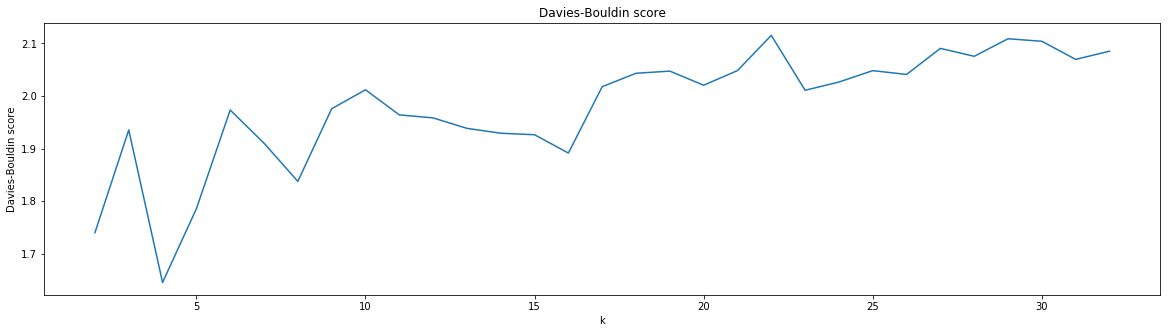

In [48]:
range_n_components = range(2, 33, 1)

davies_bouldin_array = []
for k in range_n_components:    
    mixture = GaussianMixture(n_components=k, random_state=1812, covariance_type='spherical')
    labels = mixture.fit_predict(X)    

    dvs_bldn_score = davies_bouldin_score(X, labels)
    
    davies_bouldin_array.append(dvs_bldn_score)
    
    print("Для k =", k,
          "Значение критерия Davies-Bouldin: ", dvs_bldn_score
         )

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 5)

ax1.plot(range_n_components, davies_bouldin_array)
ax1.set_xlabel('k')
ax1.set_ylabel('Davies-Bouldin score')
ax1.set_title('Davies-Bouldin score')

plt.show()

### Минимумы критерия Davies-Bouldin наблюдаются на кратных значениях - 4, 8, 16.

## <font color=red> Однозначно определить оптимальное количество кластеров не удалось. Анализ большинства критериев даёт два варианта: 4 и 6. </font>
## Важно, что оценки одних и тех же параметров для двух разных моделей (K means и Gaussian mix) дают согласованные результаты.